Connected to base (Python 3.11.4)

In [1]:
import sys
# sys.path.append('C:/Users/seany/Dropbox/Langer Lab/Data/EGG_Data_Repository/')
from Plot_EGG_adaptation import * 
from functions_read_bursts import *
import scipy.signal as sig
import os

In [2]:
gap1 = 'gap_df_48hrs_14sec.pkl'
gap2 = 'gap_df_segments_14sec.pkl'

In [3]:
dat,down= downsample_to_burst('2022.05.02_Combined.txt',scale=150, time_str='2S')

        SPI   Channel 0  Channel 1  Channel 2  Channel 3  Channel 4  \
0       255  119.183350 -11.636353 -10.340881   5.126953  22.334290   
1       255  119.137573 -11.668396 -10.359192   5.085754  22.311401   
2       255  119.096375 -11.700439 -10.377502   5.049133  22.288513   
3       255  119.064331 -11.727905 -10.391235   5.017090  22.270203   
4       255  119.027710 -11.750793 -10.404968   4.980469  22.251892   
...     ...         ...        ...        ...        ...        ...   
397543  255   17.005920 -61.532593 -56.250000 -67.185974 -16.076660   
397544  255   17.005920 -61.537170 -56.245422 -67.195129 -16.076660   
397545  255   17.005920 -61.537170 -56.250000 -67.204285 -16.081238   
397546  255   17.005920 -61.541748 -56.250000 -67.218018 -16.085815   
397547  255   17.001343 -61.550903 -56.254578 -67.236328 -16.094971   

        Channel 5  Channel 6  Channel 7         CRC  
0       82.278442  94.679260  26.765442   91.928101  
1       82.241821  94.642639  26.733398

c:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Coding\Ephys\Thesis Python\functions_read_bursts.py:1118: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  avg_vals[col]=group[col].iloc[0]
c:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Coding\Ephys\Thesis Python\functions_read_bursts.py:1118: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:00.512000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  avg_vals[col]=group[col].iloc[0]
c:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Coding\Ephys\Thesis Python\functions_read_bursts.py:1118: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future err

In [ ]:
dat0114,down0114= downsample_to_burst('2022.04.14_Terminal.txt',scale=150, time_str='2S')
dat0520,down0520= downsample_to_burst('2022.05.20_Full_End_Clipped.txt',scale=150,time_str='2S')

In [ ]:
dat0623,down0623= downsample_to_burst('2022.06.23_Az.txt',scale=150,time_str='2S')
dat0629,down0629= downsample_to_burst('2022.06.29_Az.txt',scale=150,time_str='2S')
dat0707,down0707= downsample_to_burst('2022.07.07_Az.txt',scale=150,time_str='2S')

In [4]:
down_gaps = distribute_gaps(down,gap_file=gap2,sec_gap=14,t_cycle=2)
down_gaps_ip = interpolate_egg_v3(down_gaps)

binned
2     0.69125
4     0.17500
6     0.06500
8     0.02000
10    0.02250
12    0.01625
14    0.01000
Name: count, dtype: float64
123


In [7]:
down0114_gaps = distribute_gaps(down0114,gap_file=gap2,sec_gap=14,t_cycle=2)
down0114_ip = interpolate_egg_v3(down0114_gaps)

down0520_gaps = distribute_gaps(down0520, gap_file=gap2 ,sec_gap=14,t_cycle=2)
down0520_ip = interpolate_egg_v3(down0520_gaps)

2     0.69125
4     0.17500
6     0.06500
8     0.02000
10    0.02250
12    0.01625
14    0.01000
Name: binned, dtype: float64
67
2     0.69125
4     0.17500
6     0.06500
8     0.02000
10    0.02250
12    0.01625
14    0.01000
Name: binned, dtype: float64
152


In [8]:
down0623_gaps = distribute_gaps(down0623,gap_file=gap2,sec_gap=14,t_cycle=2)
down0623_ip = interpolate_egg_v3(down0623_gaps)

down0629_gaps=distribute_gaps(down0629,gap_file=gap2,sec_gap=14,t_cycle=2)
down0629_ip=interpolate_egg_v3(down0629_gaps)

down0707_gaps=distribute_gaps(down0707,gap_file=gap2,sec_gap=14,t_cycle=2)
down0707_ip=interpolate_egg_v3(down0707_gaps)

2     0.69125
4     0.17500
6     0.06500
8     0.02000
10    0.02250
12    0.01625
14    0.01000
Name: binned, dtype: float64
132
2     0.69125
4     0.17500
6     0.06500
8     0.02000
10    0.02250
12    0.01625
14    0.01000
Name: binned, dtype: float64
111
2     0.69125
4     0.17500
6     0.06500
8     0.02000
10    0.02250
12    0.01625
14    0.01000
Name: binned, dtype: float64
173


In [56]:
merged_dat = pd.merge_asof(down_gaps_ip, dat, on='timestamps', suffixes=('_downsampled', '_actual'), direction='nearest')

In [207]:
len(merged_dat)

3193

In [57]:
for i in range(8):
    channel_actual = f'Channel {i}_actual'
    channel_downsampled = f'Channel {i}_downsampled'
    
    merged_dat[f'Channel {i}_diff'] = merged_dat[channel_actual] - merged_dat[channel_downsampled]

In [7]:
abs(merged_dat['Channel 0_diff'].mean())

0.0076187181688173585

In [8]:
abs(merged_dat['Channel 0_diff'].min())

4.457868586748759

In [9]:
abs(merged_dat['Channel 0_diff'].max())

0.9888422842182667

In [10]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

mse_channels = []
mae_channels = []
for i in range(8):
    channel_actual = f'Channel {i}_actual'
    channel_downsampled = f'Channel {i}_downsampled'
    
    # You may want to handle NaNs appropriately here if they exist
    mse_channels.append(mse(merged_dat[channel_actual], merged_dat[channel_downsampled]))
    mae_channels.append(mae(merged_dat[channel_actual], merged_dat[channel_downsampled]))

In [11]:
mse_channels

[0.018164794671045287,
 0.053336942773753546,
 0.043742889066888974,
 0.06235269103192851,
 0.020681333746301548,
 0.023788521642607367,
 0.0200009890056401,
 0.02825740782472015]

In [12]:
mae_channels

[0.03758407568866425,
 0.05515939696097709,
 0.04596842328761338,
 0.054931732542225026,
 0.03353356331568386,
 0.033241285366351035,
 0.03458638787074864,
 0.037202278809704704]

In [58]:
merged_dat['timedelta_downsampled'].replace('', np.nan, inplace=True)

# Then drop rows with NaN values in 'timedelta_downsampled'
merged_dat = merged_dat.dropna(subset=['timedelta_downsampled'])


[0.9888422842182667, 4.693587323844376, 1.3285776202490371, 2.417740864421816, 0.8949824604414829, 0.7874678000448618, 0.8719843675344481, 1.4332519234063148]
[-4.457868586748759, -5.916402117091047, -6.792620099716789, -8.683882940068163, -4.8623041416408626, -5.504321624351476, -4.343928957720081, -2.890286938487872]
[-0.005209740047295639, -0.004340390171069645, -0.0060743406332957476, -0.009245198086876938, -0.004996400353654463, -0.006517797987251507, -0.004417973096194439, -0.005120823244582016]


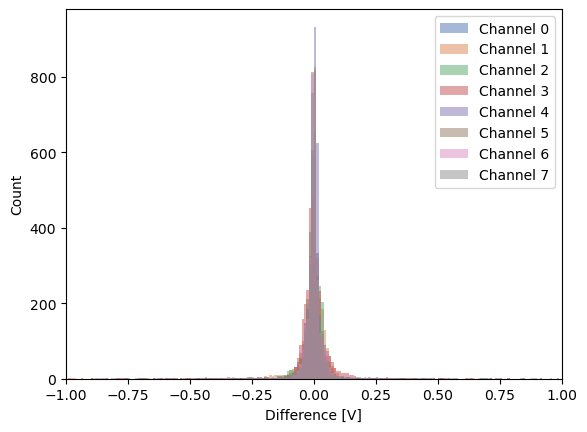

In [14]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged_dat[f'Channel {i}_diff'].max())
    min_list.append(merged_dat[f'Channel {i}_diff'].min())
    avg_list.append(merged_dat[f'Channel {i}_diff'].mean())

    plt.hist(merged_dat[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.xlabel('Difference [V]') 
plt.ylabel('Count')
plt.legend() 
plt.show()

In [ ]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-0.4, 0.4, num=101)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged_dat[f'Channel {i}_diff'].max())
    min_list.append(merged_dat[f'Channel {i}_diff'].min())
    avg_list.append(merged_dat[f'Channel {i}_diff'].mean())

    plt.hist(merged_dat[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')
    plt.xlim(-0.4, 0.4)  # Set the x-axis limits
    plt.legend()  # Add a legend to distinguish the different channels
    plt.show()  # Display the combined plot

print(max_list)


print(min_list)
print(avg_list)


[1.5812680194420992, 1.528488565760128, 1.5560337038231964, 2.461094266631605, 1.505491782130072, 1.5573699049603151, 1.6117367340779203, 5.880179607014895]
[-3.047924844769568, -8.054999434151338, -6.636549179826112, -4.614638366178049, -3.6929790168629424, -2.934912370559566, -2.4236116344746677, -5.743250103518567]
[-0.002441687324790627, -0.00882584838335292, -0.00945702303927244, -0.0024099688420645957, -0.002610597835369637, -0.003078478800271302, -0.003377320419081632, -0.0024077033358862925]


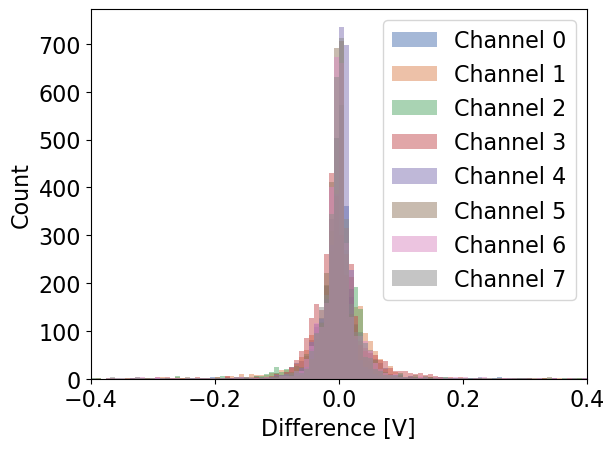

In [218]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-0.4, 0.4, num=101)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged_dat[f'Channel {i}_diff'].max())
    min_list.append(merged_dat[f'Channel {i}_diff'].min())
    avg_list.append(merged_dat[f'Channel {i}_diff'].mean())

    plt.hist(merged_dat[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-0.4, 0.4)
plt.legend()  
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.show() 

[1.066264508460165, 2.926471779880896, 3.4548070249112417, 3.3642107701109634, 1.004167258928355, 0.7277533013851993, 1.3069668038137934, 0.8436577501549465]
[-0.791590973915925, -1.3734264285636897, -0.8152130046868216, -0.9728070649621685, -0.8433938816211253, -0.7378076191663183, -0.6901539807080752, -1.4077364261263012]
[-0.0009970030398803841, -0.0004043686667464456, -0.00027326528562539803, -0.0006503739881570743, -0.0002480581376721743, -0.0006534685989678949, 0.0010159189246278651, -0.0023695594230184647]


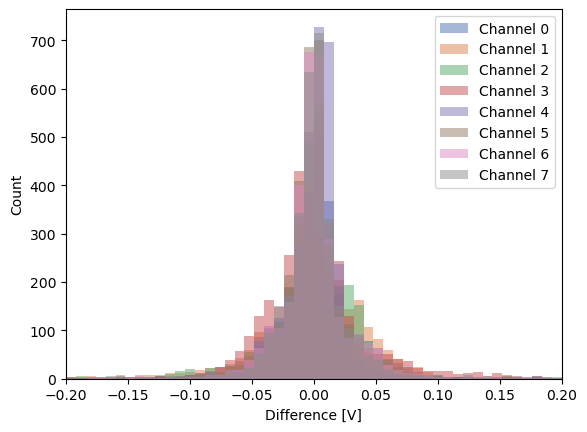

In [58]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-0.2, 0.2, num=51)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged_dat[f'Channel {i}_diff'].max())
    min_list.append(merged_dat[f'Channel {i}_diff'].min())
    avg_list.append(merged_dat[f'Channel {i}_diff'].mean())

    plt.hist(merged_dat[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-0.2, 0.2)
plt.legend() 
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.show()

In [219]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

mse_channels = []
rmse_channels = []
mae_channels = []
for i in range(8):
    channel_actual = f'Channel {i}_actual'
    channel_downsampled = f'Channel {i}_downsampled'
    
    mse_channels.append(mse(merged_dat[channel_actual], merged_dat[channel_downsampled]))
    rmse_channels.append(np.sqrt(mse(merged_dat[channel_actual], merged_dat[channel_downsampled])))
    mae_channels.append(mae(merged_dat[channel_actual], merged_dat[channel_downsampled]))

data = {
    'MSE': mse_channels,
    'RMSE': rmse_channels,
    'MAE': mae_channels
}

error_df = pd.DataFrame(data)
error_df['Channel'] = [f'Channel {i}' for i in range(8)]
error_df = error_df[['Channel', 'MSE', 'RMSE', 'MAE']]
print(error_df)




     Channel       MSE      RMSE       MAE
0  Channel 0  0.012387  0.111296  0.032438
1  Channel 1  0.055378  0.235324  0.044939
2  Channel 2  0.045105  0.212380  0.041673
3  Channel 3  0.023508  0.153323  0.045463
4  Channel 4  0.011791  0.108586  0.027001
5  Channel 5  0.008983  0.094776  0.025469
6  Channel 6  0.008408  0.091693  0.027324
7  Channel 7  0.027799  0.166729  0.029867


In [66]:
error_df

Channel       MSE      RMSE       MAE
0  Channel 0  0.004522  0.067248  0.029234
1  Channel 1  0.009270  0.096279  0.037647
2  Channel 2  0.009054  0.095155  0.032699
3  Channel 3  0.010045  0.100225  0.039802
4  Channel 4  0.003305  0.057490  0.023154
5  Channel 5  0.003075  0.055451  0.022811
6  Channel 6  0.004673  0.068361  0.025822
7  Channel 7  0.004193  0.064750  0.025089

In [15]:
from scipy.spatial import distance


error_metrics = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(8):
    channel_actual = merged_dat[f'Channel {i}_actual'].values
    channel_downsampled = merged_dat[f'Channel {i}_downsampled'].values
    
    error_metrics['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metrics['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metrics['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metrics['STD'].append(channel_actual.std())
    error_metrics['VAR'].append(channel_actual.var())

    
    error_metrics['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metrics['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

error_df = pd.DataFrame(error_metrics)
error_df['Euclidean_Norm'] = error_df['Euclidean'] / error_df['STD']
error_df['Chebyshev_Norm'] = error_df['Chebyshev'] / error_df['STD']

print(error_df)




     Channel       MSE      RMSE       MAE        STD          VAR  Euclidean  \
0  Channel 0  0.014615  0.120891  0.034303  33.425534  1117.266353   6.831151   
1  Channel 1  0.047567  0.218098  0.051010  15.444026   238.517936  12.323969   
2  Channel 2  0.037114  0.192650  0.040984  26.357030   694.693025  10.886002   
3  Channel 3  0.055164  0.234869  0.049880  17.341641   300.732502  13.271665   
4  Channel 4  0.015353  0.123906  0.029040  20.193257   407.767644   7.001524   
5  Channel 5  0.019224  0.138651  0.029114  23.961708   574.163453   7.834728   
6  Channel 6  0.013673  0.116930  0.030396  21.195402   449.245070   6.607329   
7  Channel 7  0.014705  0.121264  0.030542  19.872715   394.924787   6.852196   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   4.457869        0.204369        0.133367  
1   5.916402        0.797976        0.383087  
2   6.792620        0.413021        0.257716  
3   8.683883        0.765306        0.500753  
4   4.862304        0.346726       

In [224]:
error_df.to_csv('error_initial_dat')

In [70]:
from scipy.spatial import distance

error_metrics = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'Euclidean': [],
    'Manhattan': [],
    'Chebyshev': []
}

for i in range(8):
    channel_actual = merged_dat[f'Channel {i}_actual'].dropna().values
    channel_downsampled = merged_dat[f'Channel {i}_downsampled'].dropna().values
    
    error_metrics['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metrics['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metrics['MAE'].append(mae(channel_actual, channel_downsampled))
    
    error_metrics['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metrics['Manhattan'].append(distance.cityblock(channel_actual, channel_downsampled))
    error_metrics['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

error_df = pd.DataFrame(error_metrics)

print(error_df)

     Channel       MSE      RMSE       MAE        STD          VAR  Euclidean  \
0  Channel 0  0.004522  0.067248  0.029234  33.425534  1117.266353   3.799951   
1  Channel 1  0.009270  0.096279  0.037647  15.444026   238.517936   5.440392   
2  Channel 2  0.009054  0.095155  0.032699  26.357030   694.693025   5.376892   
3  Channel 3  0.010045  0.100225  0.039802  17.341641   300.732502   5.663378   
4  Channel 4  0.003305  0.057490  0.023154  20.193257   407.767644   3.248568   
5  Channel 5  0.003075  0.055451  0.022811  23.961708   574.163453   3.133323   
6  Channel 6  0.004673  0.068361  0.025822  21.195402   449.245070   3.862835   
7  Channel 7  0.004193  0.064750  0.025089  19.872715   394.924787   3.658801   

    Manhattan  Chebyshev  Euclidean_Norm  Manhattan_Norm  Chebyshev_Norm  
0   93.343354   1.066265        0.113684        2.792576        0.031900  
1  120.207285   2.926472        0.352265        7.783416        0.189489  
2  104.408983   3.454807        0.204002     

In [ ]:
a1,b1,c1 = signalplot(dat,time='timestamps', output='PD', order=3, freq=[.02,.2])
a2,b2,c2 = signalplot(down_gaps_ip, time='timestamps', output='PD', rate=.5, order=3,freq=[.02,.2])

In [ ]:
a1,b1,c1 = signalplot(dat,time='timestamps', output='PD', order=3, freq=[.02,.2], spacer=25)
a2,b2,c2 = signalplot(down_gaps_ip, time='timestamps', output='PD', rate=.5, order=3,freq=[.02,.2], spacer=25)

In [ ]:
a1,b1,c1 = signalplot(dat,time='timestamps', output='PD', order=3, freq=[.02,.2], spacer=50)
a2,b2,c2 = signalplot(down_gaps_ip, time='timestamps', output='PD', rate=.5, order=3,freq=[.02,.2], spacer=50)

In [76]:
c1

Synctime  Channel 0  Channel 1  Channel 2  Channel 3  Channel 4  \
0          0.016   3.351360   4.623072   1.990676   4.271761   2.268958   
1          0.032   3.351810   4.613544   1.970931   4.273017   2.248686   
2          0.048   3.352113   4.603841   1.951121   4.274144   2.228227   
3          0.064   3.352271   4.593964   1.931249   4.275144   2.207584   
4          0.080   3.352284   4.583915   1.911318   4.276017   2.186759   
...          ...        ...        ...        ...        ...        ...   
401489  6423.840  -0.000199   0.000009  -0.000005   0.000071   0.000062   
401490  6423.856  -0.000171   0.000008  -0.000004   0.000061   0.000053   
401491  6423.872  -0.000145   0.000006  -0.000003   0.000052   0.000046   
401492  6423.888  -0.000122   0.000006  -0.000003   0.000045   0.000039   
401493  6423.904  -0.000102   0.000005  -0.000002   0.000038   0.000032   

        Channel 5  Channel 6  Channel 7  
0        5.264194   5.264556   6.082707  
1        5.263507   5.262552   6.081900  
2        5.262639   5.260407   6.080936  
3        5.261592   5.258123   6.079813  
4        5.260366   5.255699   6.078535  
...           ...        ...        ...  
401489   0.000016   0.000022   0.000019  
401490   0.000014   0.000019   0.000016  
401491   0.000012   0.000016   0.000014  
401492   0.000010   0.000014   0.000012  
401493   0.000008   0.000011   0.000010  

[401494 rows x 9 columns]

In [77]:
c2

Synctime  Channel 0  Channel 1  Channel 2  Channel 3  Channel 4  \
0          2.0   0.556209  -1.613007  -2.402881   0.902529  -3.199024   
1          4.0   1.424082  -2.622391  -5.835071   1.509148  -5.001283   
2          6.0   3.061053  -3.962236 -10.521392   3.308878  -7.316003   
3          8.0   4.365942  -4.677083 -14.328031   4.598713  -9.017396   
4         10.0   6.740822  -5.925465 -17.629830   7.087655 -10.068431   
...        ...        ...        ...        ...        ...        ...   
3206    6414.0   1.007341  -0.267629  -0.088605  -0.152746  -0.103581   
3207    6416.0   0.716360  -0.290415  -0.125211  -0.170557  -0.134093   
3208    6418.0   0.456095  -0.232706  -0.104841  -0.103275  -0.092212   
3209    6420.0   0.198078  -0.115910  -0.029400  -0.047017  -0.000508   
3210    6422.0  -0.208371  -0.025971   0.002929  -0.029322  -0.003061   

      Channel 5  Channel 6  Channel 7  
0      0.237616   0.414861   1.049796  
1      0.101249   0.178698   1.282304  
2      0.898639   1.404979   3.178795  
3      0.930060   0.880715   2.766138  
4      2.994801   2.952229   6.189254  
...         ...        ...        ...  
3206  -0.111804  -0.118922  -0.016070  
3207  -0.138686  -0.142182  -0.043784  
3208  -0.113941  -0.119969  -0.037003  
3209  -0.039000  -0.045494   0.012487  
3210  -0.006036  -0.003527   0.002835  

[3211 rows x 9 columns]

In [59]:
down_gaps_ip

pseudo_time  timestamps              timedelta   Channel 0  \
0    2022-05-02 09:42:30       0.000        0 days 00:00:00  119.101868   
1    2022-05-02 09:42:32       0.512 0 days 00:00:00.512000  118.754883   
2    2022-05-02 09:42:34       2.512 0 days 00:00:02.512000  115.143127   
3    2022-05-02 09:42:36       4.512 0 days 00:00:04.512000  112.565918   
4    2022-05-02 09:42:38       6.512 0 days 00:00:06.512000  110.304565   
...                  ...         ...                    ...         ...   
3208 2022-05-02 11:29:26    6414.512 0 days 01:46:54.512000   16.720276   
3209 2022-05-02 11:29:28    6416.512 0 days 01:46:56.512000   16.876831   
3210 2022-05-02 11:29:30    6418.512 0 days 01:46:58.512000   17.054443   
3211 2022-05-02 11:29:32    6420.512 0 days 01:47:00.512000   17.150574   
3212 2022-05-02 11:29:34    6422.512 0 days 01:47:02.512000   17.030640   

      Channel 1  Channel 2  Channel 3  Channel 4  Channel 5  Channel 6  \
0    -11.696777 -10.374756   5.051880  22.291260  82.218933  94.611511   
1    -12.220459 -11.819458   4.518127  21.701660  82.223511  93.936768   
2    -15.695801 -12.303772   1.255188  18.422241  78.192444  91.096802   
3    -18.565063 -16.679993  -1.801758  17.422485  75.377197  88.003235   
4    -20.934448 -20.649719  -3.798523  15.475159  72.848511  86.068726   
...         ...        ...        ...        ...        ...        ...   
3208 -61.308289 -56.463318 -66.550598 -16.230469 -24.234009 -20.329285   
3209 -61.501465 -56.510925 -66.638489 -16.247864 -24.237671 -20.347595   
3210 -61.532593 -56.458740 -66.658630 -16.175537 -24.177246 -20.358582   
3211 -61.559143 -56.371765 -66.709900 -16.047363 -24.055481 -20.261536   
3212 -61.614075 -56.355286 -66.806946 -16.072083 -24.019775 -20.265198   

      Channel 7  
0     26.697693  
1     26.054077  
2     22.442322  
3     19.170227  
4     16.290894  
...         ...  
3208 -59.007568  
3209 -59.074402  
3210 -59.103699  
3211 -59.066162  
3212 -59.143066  

[3213 rows x 11 columns]

In [ ]:
a1,b1,c1 = signalplot(dat,time='timestamps', output='PD', order=3, freq=[.02,.2], spacer=50)
a2,b2,c2 = signalplot(down_gaps_ip, time='timestamps', output='PD', rate=.5, order=3,freq=[.02,.2], spacer=50)

In [198]:
c2

Synctime  Channel 0  Channel 1  Channel 2  Channel 3  Channel 4  \
0          2.0   0.553393  -1.628685  -2.405222   0.909984  -3.190884   
1          4.0   1.424303  -2.631163  -5.828328   1.523722  -4.989594   
2          6.0   3.066981  -3.957774 -10.498037   3.335544  -7.297699   
3          8.0   4.367626  -4.674699 -14.316398   4.617324  -9.009488   
4         10.0   6.752111  -5.901938 -17.591961   7.122990 -10.049998   
...        ...        ...        ...        ...        ...        ...   
3206    6414.0   1.011224  -0.265397  -0.086013  -0.150179  -0.101575   
3207    6416.0   0.721566  -0.287264  -0.121604  -0.166830  -0.131212   
3208    6418.0   0.462104  -0.228989  -0.100613  -0.098829  -0.088791   
3209    6420.0   0.204952  -0.111590  -0.024507  -0.041819   0.003487   
3210    6422.0  -0.201002  -0.021292   0.008214  -0.023674   0.001278   

      Channel 5  Channel 6  Channel 7  
0      0.231928   0.412930   1.029772  
1      0.097469   0.179616   1.257963  
2      0.898648   1.411023   3.146035  
3      0.928645   0.884600   2.754866  
4      3.000096   2.963907   6.163605  
...         ...        ...        ...  
3206  -0.110464  -0.117909  -0.015516  
3207  -0.136619  -0.140540  -0.042722  
3208  -0.111422  -0.117932  -0.035619  
3209  -0.036003  -0.043044   0.014205  
3210  -0.002742  -0.000815   0.004772  

[3211 rows x 9 columns]

In [ ]:
dat,down= downsample_to_burst('2022.05.02_Combined.txt',scale=150, time_str='2S')

In [97]:
down_gaps = distribute_gaps(down,gap_file=gap2,sec_gap=14,t_cycle=2)
down_gaps_ip = interpolate_egg_v3(down_gaps, time=True)

2     0.69125
4     0.17500
6     0.06500
8     0.02000
10    0.02250
12    0.01625
14    0.01000
Name: binned, dtype: float64
123


In [51]:
down_gaps = distribute_gaps(down,gap_file=gap2,sec_gap=14,t_cycle=2)
down_gaps_ip = interpolate_egg_v3(down_gaps, time=True)

binned
2     0.69125
4     0.17500
6     0.06500
8     0.02000
10    0.02250
12    0.01625
14    0.01000
Name: count, dtype: float64
123


In [55]:
dat_filt = butter_filter(dat, fs=62.5)
print(dat_filt)
down_filt = butter_filter(down_gaps_ip, fs=.5)
# down_filty = butter_filter(down_gaps_ip, fs=.5)
# print(down_filty)
# down_filt = savgol_filt(down_filty,window=3)
print(down_filt)

                   pseudo_time               realtime  misc   packet  \
0      2022-05-02 09:42:31.494 0 days 09:42:31.494000   16    51337    
1      2022-05-02 09:42:31.510 0 days 09:42:31.494000   16    51338    
2      2022-05-02 09:42:31.526 0 days 09:42:31.494000   16    51339    
3      2022-05-02 09:42:31.542 0 days 09:42:31.494000   16    51340    
4      2022-05-02 09:42:31.558 0 days 09:42:31.494000   16    51341    
...                        ...                    ...   ...      ...   
397543 2022-05-02 11:29:35.350 0 days 11:29:35.233000   16    59612    
397544 2022-05-02 11:29:35.366 0 days 11:29:35.278000   16    59613    
397545 2022-05-02 11:29:35.382 0 days 11:29:35.278000   16    59614    
397546 2022-05-02 11:29:35.398 0 days 11:29:35.278000   16    59615    
397547 2022-05-02 11:29:35.414 0 days 11:29:35.323000   16    59616    

                                                      msg   rssi  SPI  \
0        ff 00 b4 65 12 f6 2d f7 60 04 0f 13 36 46 cb ...    -

In [44]:
merged_dats = pd.merge_asof(down_filt, dat_filt, direction='nearest', on='timestamps', suffixes=('_downsampled', '_actual'))

In [50]:
merged_dats

pseudo_time_downsampled  timestamps  timedelta_downsampled  \
0        2022-05-02 09:42:30       0.000        0 days 00:00:00   
1        2022-05-02 09:42:32       0.512 0 days 00:00:00.512000   
2        2022-05-02 09:42:34       2.512 0 days 00:00:02.512000   
3        2022-05-02 09:42:36       4.512 0 days 00:00:04.512000   
4        2022-05-02 09:42:38       6.512 0 days 00:00:06.512000   
...                      ...         ...                    ...   
3208     2022-05-02 11:29:26    6414.512 0 days 01:46:54.512000   
3209     2022-05-02 11:29:28    6416.512 0 days 01:46:56.512000   
3210     2022-05-02 11:29:30    6418.512 0 days 01:46:58.512000   
3211     2022-05-02 11:29:32    6420.512 0 days 01:47:00.512000   
3212     2022-05-02 11:29:34    6422.512 0 days 01:47:02.512000   

      Channel 0_downsampled  Channel 1_downsampled  Channel 2_downsampled  \
0                  0.354383               0.369629              -0.247775   
1                  1.651326               0.101278              -1.443751   
2                  2.709168              -0.394909              -3.427083   
3                  3.315270              -1.805241              -6.714086   
4                  4.236541              -2.867209             -10.638039   
...                     ...                    ...                    ...   
3208               0.929973              -0.270765              -0.094735   
3209               0.673343              -0.264932              -0.108939   
3210               0.422398              -0.212937              -0.084469   
3211               0.137213              -0.116343              -0.033851   
3212              -0.188917              -0.021531               0.014621   

      Channel 3_downsampled  Channel 4_downsampled  Channel 5_downsampled  \
0                  0.474008               0.549405               0.677936   
1                  1.956580              -1.381229               1.628621   
2                  3.053990              -3.130491               2.175131   
3                  3.751030              -5.393923               2.008329   
4                  4.654516              -7.127196               1.953362   
...                     ...                    ...                    ...   
3208              -0.154236              -0.106668              -0.119462   
3209              -0.139315              -0.099460              -0.115631   
3210              -0.091965              -0.054305              -0.086443   
3211              -0.048411              -0.009345              -0.039345   
3212              -0.021702               0.022892               0.007737   

      Channel 6_downsampled  ...  Channel 1_actual Channel 2_actual  \
0                  0.545891  ...          4.633874         1.991059   
1                  1.539679  ...          4.252592         1.344143   
2                  2.132077  ...          2.021209        -1.091690   
3                  2.303920  ...          0.101991        -4.779764   
4                  2.143733  ...         -1.539290        -8.665775   
...                     ...  ...               ...              ...   
3208              -0.132992  ...         -0.057691        -0.044171   
3209              -0.122860  ...         -0.079962        -0.083320   
3210              -0.089919  ...         -0.045690        -0.073649   
3211              -0.044150  ...         -0.010163        -0.026575   
3212               0.010180  ...          0.001262        -0.000669   

     Channel 3_actual Channel 4_actual Channel 5_actual Channel 6_actual  \
0            4.303651         2.330062         5.238007         5.245001   
1            4.286250         1.604040         5.133900         5.118630   
2            3.623154        -1.356254         3.828530         3.925512   
3            3.157039        -2.986392         2.870552         2.851376   
4            3.552828        -5.175109         2.320560         2.554876   
...               ...              ...   

In [46]:
from scipy.spatial import distance

error_metrics2 = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'AVG':[],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': []
    # 'Euclidean': [],
    # 'Chebyshev': []
}

for i in range(8):
    channel_actual = merged_dats[f'Channel {i}_actual'].dropna().values
    channel_downsampled = merged_dats[f'Channel {i}_downsampled'].dropna().values
    channel_diff = merged_dats[f'Channel {i}_diff'].dropna().values
    
    error_metrics2['AVG'].append(np.abs(channel_diff.mean()))
    error_metrics2['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metrics2['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metrics2['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metrics2['STD'].append(channel_actual.std())
    error_metrics2['VAR'].append(channel_actual.var())

    
    # error_metrics2['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    # error_metrics2['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

error_df2 = pd.DataFrame(error_metrics2)
# error_df2['Euclidean_Norm'] = error_df2['Euclidean'] / error_df2['STD']
# error_df2['Chebyshev_Norm'] = error_df2['Chebyshev'] / error_df2['STD']

print(error_df2)



KeyError: 'Channel 0_diff'

In [38]:
for i in range(8):
    channel_actual = f'Channel {i}_actual'
    channel_downsampled = f'Channel {i}_downsampled'
    
    # You may want to handle NaNs appropriately here if they exist
    merged_dats[f'Channel {i}_diff'] = merged_dats[channel_actual] - merged_dats[channel_downsampled]

[3.5644565727350344, 4.7985025907536185, 3.290313216179812, 4.309449152273816, 4.185885435742168, 5.231661770830197, 5.155615546354705, 6.026550659654337]
[-2.6354586891133276, -4.696413544438089, -6.066022890542562, -7.306480604505775, -3.6048730228869834, -3.537123275952282, -2.934358492967999, -3.061135726637866]
[-0.001834750874080609, 0.012485943512221183, 0.008931002552270877, -0.00038294715309965965, 0.007960828063866724, 0.003294320961900092, 0.0045878926087471045, -0.002103147605490566]


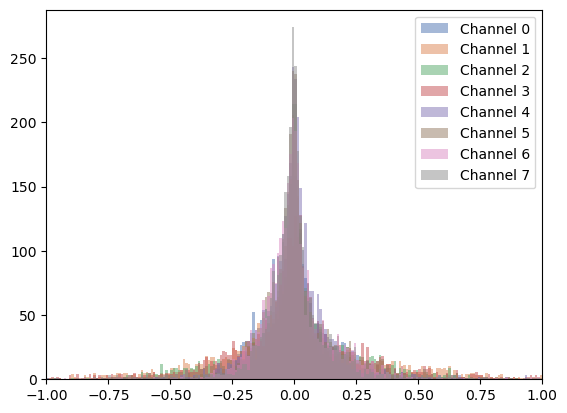

In [39]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged_dats[f'Channel {i}_diff'].max())
    min_list.append(merged_dats[f'Channel {i}_diff'].min())
    avg_list.append(merged_dats[f'Channel {i}_diff'].mean())

    plt.hist(merged_dats[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.legend()
plt.show()

[4.703764734859737, 5.292476080211669, 7.534746616597872, 10.001209492904588, 4.813979281647772, 5.257381110059632, 5.167301622726239, 6.051269527656921]
[-2.4131517865447947, -2.3941758158237274, -2.8832243754873303, -2.419192740989761, -2.7458647269928793, -2.109955733843133, -2.1451456404999174, -3.1254037783912723]
[-0.0017400166274896493, 0.012601424238324648, 0.009061641956053997, -0.0002113639567931261, 0.007996488563446612, 0.003365250002104914, 0.00463855721629186, -0.002111076685675578]


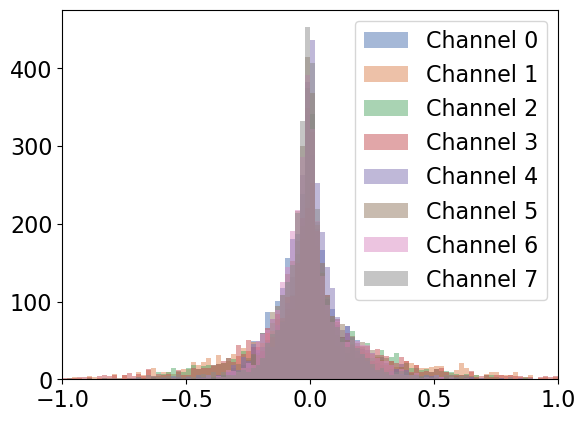

In [106]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=101)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged_dats[f'Channel {i}_diff'].max())
    min_list.append(merged_dats[f'Channel {i}_diff'].min())
    avg_list.append(merged_dats[f'Channel {i}_diff'].mean())

    plt.hist(merged_dats[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.legend()
plt.show()

[4.703764734859737, 5.292476080211669, 7.534746616597872, 10.001209492904588, 4.813979281647772, 5.257381110059632, 5.167301622726239, 6.051269527656921]
[-2.4131517865447947, -2.3941758158237274, -2.8832243754873303, -2.419192740989761, -2.7458647269928793, -2.109955733843133, -2.1451456404999174, -3.1254037783912723]
[-0.0017400166274896493, 0.012601424238324648, 0.009061641956053997, -0.0002113639567931261, 0.007996488563446612, 0.003365250002104914, 0.00463855721629186, -0.002111076685675578]


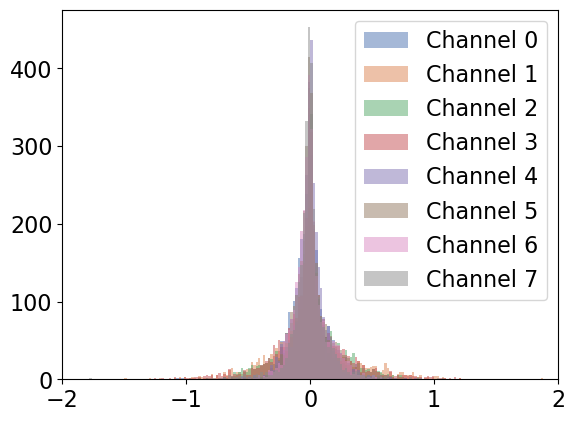

In [107]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-2, 2, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged_dats[f'Channel {i}_diff'].max())
    min_list.append(merged_dats[f'Channel {i}_diff'].min())
    avg_list.append(merged_dats[f'Channel {i}_diff'].mean())

    plt.hist(merged_dats[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-2, 2)
plt.legend() 
plt.show() 

[4.703764734859737, 5.292476080211669, 7.534746616597872, 10.001209492904588, 4.813979281647772, 5.257381110059632, 5.167301622726239, 6.051269527656921]
[-2.4131517865447947, -2.3941758158237274, -2.8832243754873303, -2.419192740989761, -2.7458647269928793, -2.109955733843133, -2.1451456404999174, -3.1254037783912723]
[-0.0017400166274896493, 0.012601424238324648, 0.009061641956053997, -0.0002113639567931261, 0.007996488563446612, 0.003365250002104914, 0.00463855721629186, -0.002111076685675578]


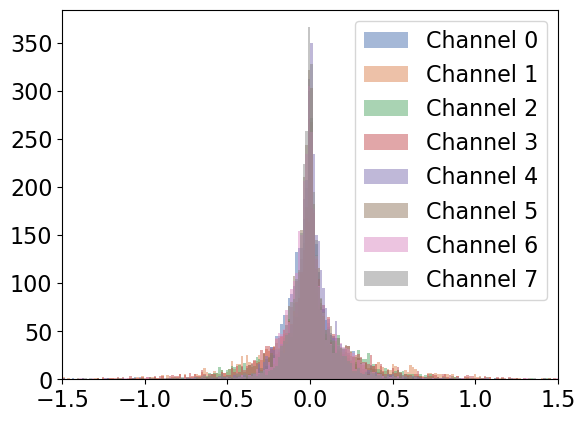

In [109]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1.5, 1.5, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged_dats[f'Channel {i}_diff'].max())
    min_list.append(merged_dats[f'Channel {i}_diff'].min())
    avg_list.append(merged_dats[f'Channel {i}_diff'].mean())

    plt.hist(merged_dats[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1.5, 1.5)
plt.show()

[2.15531985599403, 4.231368087582998, 3.052705528776526, 2.8776601785526883, 2.732232052305564, 3.981238526242948, 3.878866172899227, 4.234773430391419]
[-2.5758598670748953, -6.344379000881663, -5.0873171262927945, -2.830465822770236, -3.920681646617174, -2.3231744526831646, -2.347119537509716, -4.269818448852089]
[-0.0037035042626853616, 0.002644421515352306, 0.004598622265165184, -0.00161986527851052, 0.00386643195054015, 0.0003847561214473724, 0.0004242180514602424, -0.0006813169065632062]


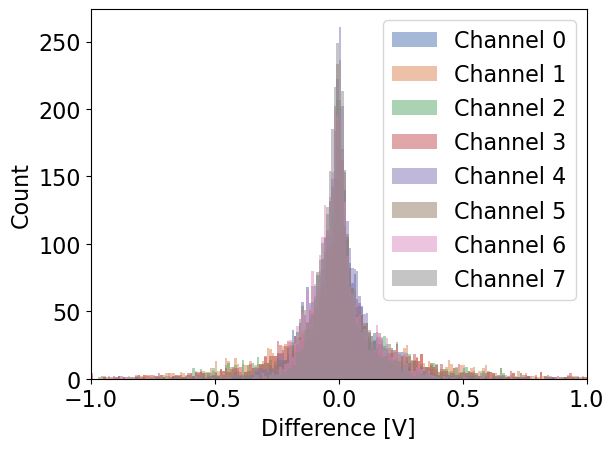

     Channel       MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.033977  0.184327  0.106826  0.983844  0.967949  10.445029   
1  Channel 1  0.128096  0.357906  0.199918  1.325955  1.758155  20.280967   
2  Channel 2  0.081647  0.285739  0.153418  1.040606  1.082860  16.191583   
3  Channel 3  0.086895  0.294780  0.178567  0.718997  0.516957  16.703894   
4  Channel 4  0.037181  0.192823  0.092617  0.845200  0.714362  10.926433   
5  Channel 5  0.031919  0.178658  0.090622  0.819243  0.671159  10.123775   
6  Channel 6  0.030894  0.175768  0.093111  0.717287  0.514501   9.960012   
7  Channel 7  0.054216  0.232844  0.099477  0.963128  0.927615  13.194283   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   2.575860       10.616548        2.618158  
1   6.344379       15.295372        4.784764  
2   5.087317       15.559768        4.888804  
3   2.877660       23.232209        4.002324  
4   3.920682       12.927635        4.638764  
5   3.981239       12.35

In [203]:
c2c1 = pd.merge_asof(c2,c1,on='Synctime', direction='nearest', suffixes=('_downs', '_true'))
for i in range(8):
    channel_actual = f'Channel {i}_true'
    channel_downsampled = f'Channel {i}_downs'
    
    c2c1[f'Channel {i}_diff'] = c2c1[channel_actual] - c2c1[channel_downsampled]

import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(c2c1[f'Channel {i}_diff'].max())
    min_list.append(c2c1[f'Channel {i}_diff'].min())
    avg_list.append(c2c1[f'Channel {i}_diff'].mean())

    plt.hist(c2c1[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()
plt.show()

from scipy.spatial import distance
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

error_metrics = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(8):
    channel_actual = c2c1[f'Channel {i}_true'].values
    channel_downsampled = c2c1[f'Channel {i}_downs'].values
    
    error_metrics['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metrics['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metrics['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metrics['STD'].append(channel_actual.std())
    error_metrics['VAR'].append(channel_actual.var())

    
    error_metrics['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metrics['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

error_df = pd.DataFrame(error_metrics)
error_df['Euclidean_Norm'] = error_df['Euclidean'] / error_df['STD']
error_df['Chebyshev_Norm'] = error_df['Chebyshev'] / error_df['STD']

print(error_df)


In [184]:
#%% Downsample from nonfiltered raw or filtered data from signalplot output
def downsample_from_signalplot(df, time_str='2S', filtered=False):
    if filtered == True: 
        df['timedelta'] = pd.to_timedelta(df['Synctime'], unit='s')
    df.set_index('timedelta', inplace=True)
    resampled_df = df.resample(time_str,label='left').apply(burst_resampler)
    df.reset_index(inplace=True)
    resampled_df.reset_index(inplace=True)

    return df, resampled_df
    

In [185]:
c1_2, c1_down = downsample_from_signalplot(c1, filtered=True)

In [186]:
merged = pd.merge_asof(c1_down, c1, on='Synctime', direction='nearest', suffixes=('_downs', '_true'))

In [187]:
for i in range(8):
    channel_actual = f'Channel {i}_true'
    channel_downsampled = f'Channel {i}_downs'
    
    merged[f'Channel {i}_diff'] = merged[channel_actual] - merged[channel_downsampled]

[0.1715240409577783, 0.2096955837563108, 0.20366074617393615, 0.18685818750770566, 0.19547067693863696, 0.20895811403938325, 0.24957517359181658, 0.3109028913026606]
[-0.16280406075046017, -0.2120656143571793, -0.2453919165906342, -0.3202513802141569, -0.2400132224506759, -0.20245518777091664, -0.14978152942174638, -0.20596439117088572]
[1.618026584149293e-05, 2.5474864951431165e-05, 1.650588712099971e-05, 1.9455251446838265e-05, 1.7129988819206886e-05, 2.5521317668135922e-05, 2.6021583007726643e-05, 3.0181529304203184e-05]


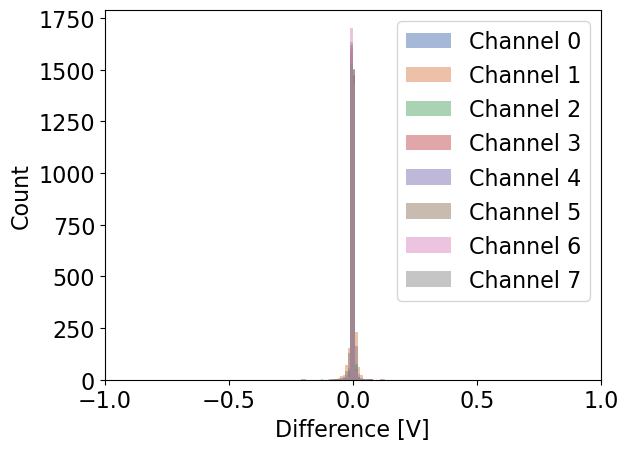

     Channel       MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.000103  0.010137  0.004932  0.985469  0.971150   0.574534   
1  Channel 1  0.000161  0.012696  0.006236  1.328259  1.764272   0.719549   
2  Channel 2  0.000110  0.010480  0.003651  1.041055  1.083796   0.593951   
3  Channel 3  0.000108  0.010401  0.003370  0.722817  0.522465   0.589451   
4  Channel 4  0.000122  0.011035  0.002946  0.846038  0.715780   0.625394   
5  Channel 5  0.000099  0.009926  0.003118  0.824355  0.679562   0.562550   
6  Channel 6  0.000070  0.008385  0.002690  0.723152  0.522949   0.475227   
7  Channel 7  0.000146  0.012081  0.003680  0.968914  0.938794   0.684696   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   0.171524        0.583005        0.174053  
1   0.212066        0.541723        0.159657  
2   0.245392        0.570528        0.235715  
3   0.320251        0.815491        0.443060  
4   0.240013        0.739203        0.283691  
5   0.208958        0.68

In [225]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged[f'Channel {i}_diff'].max())
    min_list.append(merged[f'Channel {i}_diff'].min())
    avg_list.append(merged[f'Channel {i}_diff'].mean())

    plt.hist(merged[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()
plt.show()

from scipy.spatial import distance
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

error_metrics = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(8):
    channel_actual = merged[f'Channel {i}_true'].dropna().values
    channel_downsampled = merged[f'Channel {i}_downs'].dropna().values
    
    error_metrics['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metrics['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metrics['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metrics['STD'].append(channel_actual.std())
    error_metrics['VAR'].append(channel_actual.var())

    
    error_metrics['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metrics['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

error_df = pd.DataFrame(error_metrics)
error_df['Euclidean_Norm'] = error_df['Euclidean'] / error_df['STD']
error_df['Chebyshev_Norm'] = error_df['Chebyshev'] / error_df['STD']

print(error_df)

error_df.to_csv('error_filtered_then_downsampled')

[0.1715240409577783, 0.2096955837563108, 0.20366074617393615, 0.18685818750770566, 0.19547067693863696, 0.20895811403938325, 0.24957517359181658, 0.3109028913026606]
[-0.16280406075046017, -0.2120656143571793, -0.2453919165906342, -0.3202513802141569, -0.2400132224506759, -0.20245518777091664, -0.14978152942174638, -0.20596439117088572]
[1.618026584149293e-05, 2.5474864951431165e-05, 1.650588712099971e-05, 1.9455251446838265e-05, 1.7129988819206886e-05, 2.5521317668135922e-05, 2.6021583007726643e-05, 3.0181529304203184e-05]


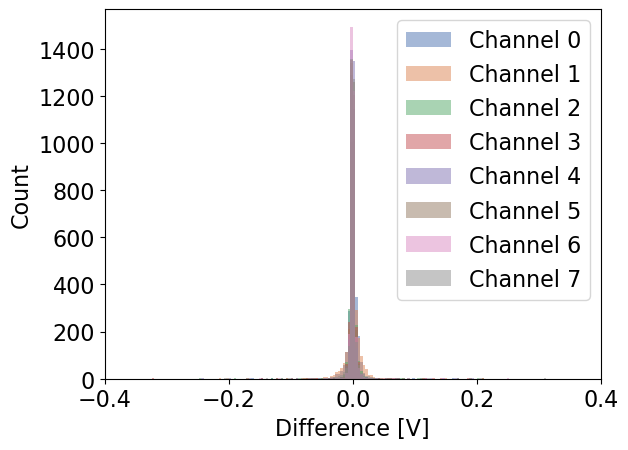

In [172]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-0.4, .4, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merged[f'Channel {i}_diff'].max())
    min_list.append(merged[f'Channel {i}_diff'].min())
    avg_list.append(merged[f'Channel {i}_diff'].mean())

    plt.hist(merged[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-0.4, .4)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()
plt.show() 

In [19]:
def egg_filter2(df, rate=62.5, freq=[0.02, 0.2], order=3, ncomb=0):
    """
    Function which filters data using a Butterworth filter for each channel in a DataFrame.
    """
    fn = rate / 2
    wn = np.array(freq) / fn
    wn[1] = np.min([0.99, wn[1]])

    filtered_df = pd.DataFrame()
    filtered_df['timestamps'] = df['timestamps']
    filtered_df['timedelta'] = df['timedelta']

    for col in df.columns:
        if col.startswith('Channel '):
            f = interp1d(df['timestamps'], df[col], bounds_error=False)

            start_value = df['timestamps'].min()
            end_value = df['timestamps'].max()
            tfixed = np.arange(start_value, end_value, 1 / rate)

            sos = sig.butter(order, wn, btype='bandpass', output='sos')
            filtered = sig.sosfiltfilt(sos, f(tfixed))

            if ncomb != 0:
                if not isinstance(ncomb, list):
                    ncomb = [ncomb]
                for ele in ncomb:
                    c, d = sig.iircomb(ele / rate, 3)
                    filtered = sig.filtfilt(c, d, filtered)

            filtered_df[col] = np.interp(df['timestamps'], tfixed, filtered)

    return filtered_df

In [174]:
dat_filt = egg_filter2(dat, rate=62.5, freq=[0.02,0.2])
dat_filt2 = butter_filter(dat,fs=62.5)

In [175]:
down_gaps_ip.dropna(inplace=True)
down_filt = egg_filter2(down_gaps_ip, rate=.5, freq=[0.02,0.2])
# down_filt.dropna(inplace=True)
down_filt2 = butter_filter(down_gaps_ip,fs=.5)

In [176]:

merges = pd.merge_asof(down_filt, dat_filt, on='timestamps', suffixes=('_downs','_true'), direction='nearest')
merges2 = pd.merge_asof(down_filt2, dat_filt2, on='timestamps', suffixes=('_downs','_true'), direction='nearest')

In [177]:
for i in range(8):
    merges[f'Channel {i}_diff'] = merges[f'Channel {i}_true']-merges[f'Channel {i}_downs']
    merges2[f'Channel {i}_diff'] = merges2[f'Channel {i}_true']-merges2[f'Channel {i}_downs']

In [36]:
merges

timestamps  Channel 0_downs  Channel 1_downs  Channel 2_downs  \
0          0.000       -12.523770         5.421801       -13.890698   
1          0.512       -13.341081         5.407218       -13.778712   
2          2.512       -16.523327         5.357963       -13.332611   
3          4.512       -19.660237         5.341207       -12.852635   
4          6.512       -22.733132         5.366091       -12.338579   
...          ...              ...              ...              ...   
3188    6414.512        -2.972571         0.869385         0.271082   
3189    6416.512        -2.675219         0.795645         0.247840   
3190    6418.512        -2.389001         0.722079         0.224725   
3191    6420.512        -2.115835         0.649440         0.201952   
3192    6422.512        -1.920523         0.596216         0.185287   

      Channel 3_downs  Channel 4_downs  Channel 5_downs  Channel 6_downs  \
0           15.379398         0.843628        -1.094521         3.992883   
1           14.767769         1.154209        -1.519746         3.576801   
2           12.386317         2.366338        -3.177088         1.953343   
3           10.039410         3.574005        -4.816825         0.339883   
4            7.743991         4.776109        -6.426650        -1.253013   
...               ...              ...              ...              ...   
3188         0.416068         0.245399         0.043924         0.328630   
3189         0.377515         0.225911         0.043107         0.297168   
3190         0.339922         0.206116         0.041619         0.266672   
3191         0.303533         0.186286         0.039563         0.237339   
3192         0.277227         0.171621         0.037763         0.216237   

      Channel 7_downs  Channel 0_true  ...  Channel 6_true  Channel 7_true  \
0            2.246886        0.984423  ...        7.776909   -2.278655e+00   
1            1.755751        0.562764  ...        7.570305   -2.514733e+00   
2           -0.159905       -1.122127  ...        6.747669   -3.439176e+00   
3           -2.060115       -2.857902  ...        5.904475   -4.361083e+00   
4           -3.928070       -4.631202  ...        5.046637   -5.272213e+00   
...               ...             ...  ...             ...             ...   
3188         0.459921       -0.008344  ...        0.001317   -2.793817e-04   
3189         0.423767       -0.003622  ...        0.000558   -1.013773e-04   
3190         0.386900       -0.001187  ...        0.000179   -2.716591e-05   
3191         0.349830       -0.000231  ...        0.000034   -4.176958e-06   
3192         0.322345       -0.000011  ...        0.000002   -1.567477e-07   

      Channel 0_diff  Channel 1_diff  Channel 2_diff  Channel 3_diff  \
0          13.508192       -7.490340       -0.512231        5.487811   
1          13.903846       -7.479880       -0.576427        5.805731   
2          15.401200       -7.407795       -0.804266        7.020819   
3          16.802335       -7.301783       -1.014388        8.178575   
4          18.101931       -7.165550       -1.205719        9.272640   
...              ...             ...             ...             ...   
3188        2.964227       -0.868663       -0.270400       -0.414635   
3189        2.671597       -0.795324       -0.247551       -0.376915   
3190        2.387814       -0.721971       -0.224633       -0.339732   
3191        2.115604       -0.649419       -0.201935       -0.303498   
3192        1.920512       -0.596215       -0.185286       -0.277225   

      Channel 4_diff  Channel 5_diff  Channel 6_diff  Channel 7_diff  
0         -13.471190        2.566284        3.784025       -4.525541  
1         -13.615018        2.779902        3.993503       -4.270484  
2         -14.134061        3.601006        4.794326       -3.279270  
3         -14.583548        4.394323        5.564592       -2.300968  
4         -14.964943        5.154672        6.299650       -1.344143  
...         

[3.534337018954678, 4.835211129091696, 2.8661039071294123, 4.282083831781921, 4.231141775658906, 5.285923310374618, 5.205934207179183, 5.974779142812727]
[-3.1763421043812485, -5.516778090797476, -4.707312782207342, -3.151734218826027, -3.6974531338477954, -2.389636339869187, -3.2043584710967163, -4.449347324346881]
[-0.001832373935823458, 0.005818427891235775, 0.005861001178338521, -0.0002594914905142504, 0.005333798167619985, 0.003445211536933716, 0.00332576418060284, 0.0027024618367233032]


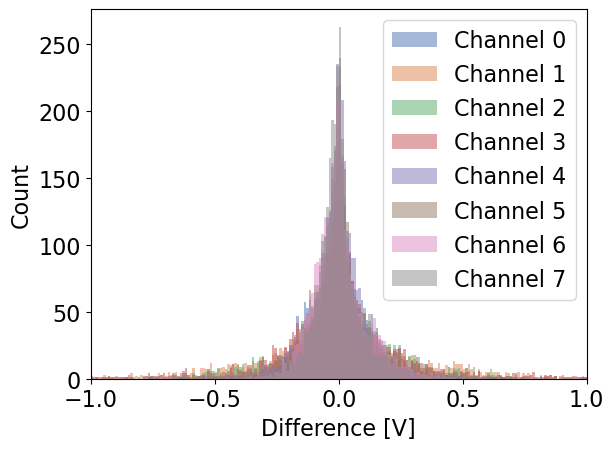

In [178]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1 , 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merges[f'Channel {i}_diff'].max())
    min_list.append(merges[f'Channel {i}_diff'].min())
    avg_list.append(merges[f'Channel {i}_diff'].mean())

    plt.hist(merges[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1 , 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()  
plt.show() 

[3.6258587616184608, 4.846893983428265, 3.5820518648466164, 4.357153443033559, 4.43045663669112, 5.263331260384384, 5.181488834587516, 6.044023283046457]
[-2.5197473665539114, -6.979298435048085, -5.791289431483073, -3.1669838454980814, -3.9625822330542464, -2.185088263547956, -2.176610963682153, -4.561758554473988]
[-0.0025959600350087455, 0.004780292240997823, 0.0059569652562826364, -0.001056878895743578, 0.004721101242463029, 0.0023203144850644734, 0.0021868463146388893, 0.0003481718782689879]


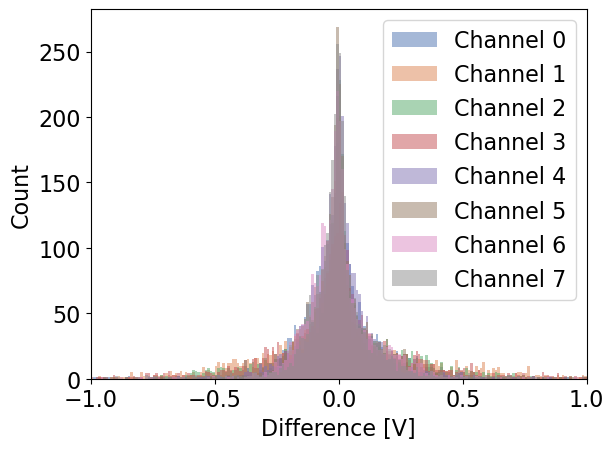

In [179]:
import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1 , 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merges2[f'Channel {i}_diff'].max())
    min_list.append(merges2[f'Channel {i}_diff'].min())
    avg_list.append(merges2[f'Channel {i}_diff'].mean())

    plt.hist(merges2[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1 , 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()  
plt.show()  

In [182]:
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

error_metrics = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(8):
    channel_actual = merges[f'Channel {i}_true'].dropna().values
    channel_downsampled = merges[f'Channel {i}_downs'].dropna().values
    
    error_metrics['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metrics['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metrics['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metrics['STD'].append(channel_actual.std())
    error_metrics['VAR'].append(channel_actual.var())

    
    error_metrics['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metrics['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

error_df = pd.DataFrame(error_metrics)
error_df['Euclidean_Norm'] = error_df['Euclidean'] / error_df['STD']
error_df['Chebyshev_Norm'] = error_df['Chebyshev'] / error_df['STD']

print(error_df)



     Channel       MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.045959  0.214380  0.109882  0.989349  0.978811  12.113870   
1  Channel 1  0.140904  0.375372  0.196986  1.333672  1.778682  21.211014   
2  Channel 2  0.084155  0.290094  0.151302  1.044615  1.091220  16.392262   
3  Channel 3  0.097562  0.312349  0.173734  0.727613  0.529420  17.649775   
4  Channel 4  0.048760  0.220817  0.094006  0.848411  0.719801  12.477600   
5  Channel 5  0.053441  0.231173  0.093306  0.831698  0.691721  13.062815   
6  Channel 6  0.048994  0.221347  0.093570  0.730555  0.533711  12.507564   
7  Channel 7  0.082999  0.288096  0.103588  0.976695  0.953932  16.279310   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   3.534337       12.244285        3.572387  
1   5.516778       15.904217        4.136532  
2   4.707313       15.692161        4.506267  
3   4.282084       24.257107        5.885115  
4   4.231142       14.707022        4.987137  
5   5.285923       15.70

In [183]:
error_metrics2 = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(8):
    channel_actual = merges2[f'Channel {i}_true'].dropna().values
    channel_downsampled = merges2[f'Channel {i}_downs'].dropna().values
    
    error_metrics2['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metrics2['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metrics2['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metrics2['STD'].append(channel_actual.std())
    error_metrics2['VAR'].append(channel_actual.var())

    error_metrics2['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metrics2['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

error_df2 = pd.DataFrame(error_metrics2)
error_df2['Euclidean_Norm'] = error_df2['Euclidean'] / error_df2['STD']
error_df2['Chebyshev_Norm'] = error_df2['Chebyshev'] / error_df2['STD']

print(error_df2)

     Channel       MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.047022  0.216845  0.117239  0.993405  0.986853  12.253167   
1  Channel 1  0.151666  0.389443  0.211672  1.338547  1.791707  22.006138   
2  Channel 2  0.098781  0.314295  0.162445  1.049390  1.101219  17.759760   
3  Channel 3  0.107473  0.327831  0.191643  0.722810  0.522454  18.524627   
4  Channel 4  0.044577  0.211134  0.098857  0.840666  0.706720  11.930447   
5  Channel 5  0.043921  0.209574  0.098428  0.844897  0.713851  11.842304   
6  Channel 6  0.042995  0.207351  0.103838  0.739593  0.546998  11.716719   
7  Channel 7  0.070257  0.265060  0.110213  0.988339  0.976814  14.977641   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   3.625859       12.334514        3.649930  
1   6.979298       16.440322        5.214087  
2   5.791289       16.923888        5.518720  
3   4.357153       25.628638        6.028079  
4   4.430457       14.191654        5.270172  
5   5.263331       14.01

In [4]:
def read_egg_v3_sync(file,header=0,rate=62.5,scale=150,error=0, date=None):
    """
    This is a function which uses pandas to read in data recorded from EGG V3 and transmitted to a board using
    RFStudio7. 
    
    file : filepath of the target txt file
    header : Number of lines to skip
    rate : Sampling rate in samples/second per channel set on the ADS131m8
    scale : +- scale in mV 
    error : returns data with CRC errors. Default is 0 so those are stripped
    
    output: Pandas data frame with the following information:
        .realtime : realtime from RFStudio when packet was received
        .misc : RF Studio output, not useful
        .packet : packet number, set from EGGv3, ranges from 0 to 65535 (unit16). Roll over if higher
        .msg : str of packet recieved
        .rssi : RSSI of packet, also includes CRC error
        'Channel n': Channels of recording data in mV, n is from 0 to 7
        .counter : absolute renumbered packets (without overflow)
        .timestamps : timesamples calculated from sampling rate and absolute timer
        .SPI : SPI Status (first packet of msg)
    
    """
    if date is None:
        # get only the filename from the file path
        file_path = pathlib.Path(file)
        filename = file_path.name
        # extract date from the filename
        date = filename.split('_')[0]

    # Creating datetime object
    base_date = datetime.strptime(date, '%Y.%m.%d')
    print(base_date)
    dat=pd.read_csv(file, header=header, dtype = str, delimiter='|', names=['realtime','misc','packet','msg','rssi'])
    dat=dat[~dat.rssi.str.contains('error')]
    dat=dat[dat.misc.str.contains('16')]
    dat=dat.reset_index(drop=True)
    dat_col=dat.msg
    hexdat=dat_col.str.split(' ') #Return list of splits based on spaces in msg
    serieslist=[]
    for k,ele in enumerate(hexdat):
        if len(ele) == 23: #Only select those that have the correct length
            vlist=[]
            for i in range(0,10):
                n=i*2+2
                value= ''.join(['0x',ele[n],ele[n-1]])
                hvalue=int(value,16)
                if i==0:
                    vlist.append(hvalue) #append hex code
                else:    
                    if hvalue<2**15:
                        vlist.append(scale*float(hvalue)/(2**15))
                    else:
                        vlist.append(scale*(((float(hvalue)-2**16)/(2**15))))
        else:
#            print('Line Error!'+str(k))
#            print(ele)
            vlist=[] #add empty list on error
        serieslist.append(vlist)
    collist=['SPI']
    for i in range(8): collist.append('Channel '+str(i)) #make channel list name
    collist.append('CRC')
    datalist=pd.DataFrame(serieslist,columns=collist)
    fulldat=pd.concat((dat,datalist),axis=1)
    counter=fulldat.packet.astype(int)
    new_counter=[0]
    for j,ele in enumerate(counter[1:]): #Renumbered counter - note this will give an error if you accidentally miss the 0/65535 packets
        step=counter[j+1]-counter[j]
#       if step != -65535:
        if step > 0:
            new_counter.append(step+new_counter[j])
#       elif step < 0:
#            new_counter.append(new_counter[j])
        else:
            new_counter.append(65536-counter[j]+counter[j+1]+new_counter[j])
            print('flip', step, 65536-counter[j]+counter[j+1])
#            new_counter.append(1+new_counter[j])
    tarray=np.array(new_counter)*1/rate
    abscounterseries=pd.Series(new_counter,name='counter')
    tseries=pd.Series(tarray,name='timestamps')
    fulldat=pd.concat((fulldat,abscounterseries,tseries),axis=1)
    
    fulldat['timedelta'] = pd.to_timedelta(fulldat['timestamps'], unit='s')
    fulldat['realtime'] = fulldat['realtime'].str.strip()
    fulldat['realtime'] = pd.to_timedelta(fulldat['realtime'])
    base_time = base_date + fulldat['realtime'].iloc[0]
    fulldat['realtime'] = pd.to_timedelta(fulldat['timestamps'], unit='s') + base_time
    noerror=~fulldat.rssi.str.contains('error') # Gives rows without crc error
    if error: 
        return fulldat # return non-crc error 
    else:
        return fulldat[noerror]
#    hexdat.dropna() #drop out of range NaNs without shifting indicies

In [18]:
dat = read_egg_v3_sync('2022.05.02_Combined.txt', scale=150)

#%% Downsample from nonfiltered raw or filtered data from signalplot output
def downsample_from_signalplot(df, time_str='2S', filtered=False):
    if filtered == True: 
        df['timedelta'] = pd.to_timedelta(df['Synctime'], unit='s')
    df.set_index('timedelta', inplace=True)
    resampled_df = df.resample(time_str,label='left').apply(burst_resampler)
    df.reset_index(inplace=True)
    resampled_df.reset_index(inplace=True)

    return df, resampled_df

dats, downs = downsample_from_signalplot(dat)
downs = downs.dropna()

2022-05-02 00:00:00
flip -65535 1
flip -65535 1
flip -65535 1
flip -65535 1
flip -65535 1
flip -65535 1


c:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Coding\Ephys\Thesis Python\functions_read_bursts.py:1115: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2022-05-02 09:42:31.494000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  avg_vals[col]=group[col].iloc[0]
c:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Coding\Ephys\Thesis Python\functions_read_bursts.py:1115: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2022-05-02 09:42:33.494000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  avg_vals[col]=group[col].iloc[0]
c:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Coding\Ephys\Thesis Python\functions_read_bursts.py:1115: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise 

In [154]:
mergus = pd.merge_asof(downs, dats, on='timedelta', suffixes=('_downs', '_true'), direction='nearest')
mergus = mergus.dropna()

In [155]:
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

error_metr = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(8):
    channel_actual = mergus[f'Channel {i}_true'].values
    channel_downsampled = mergus[f'Channel {i}_downs'].values
    
    error_metr['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metr['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metr['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metr['STD'].append(channel_actual.std())
    error_metr['VAR'].append(channel_actual.var())

    error_metr['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metr['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

err_df = pd.DataFrame(error_metr)
err_df['Euclidean_Norm'] = err_df['Euclidean'] / err_df['STD']
err_df['Chebyshev_Norm'] = err_df['Chebyshev'] / err_df['STD']

print(err_df)

     Channel       MSE      RMSE       MAE        STD          VAR  Euclidean  \
0  Channel 0  0.000896  0.029939  0.020331  33.404429  1115.855900   1.690674   
1  Channel 1  0.001680  0.040982  0.026614  15.457625   238.938164   2.314319   
2  Channel 2  0.001133  0.033657  0.022411  26.361153   694.910413   1.900655   
3  Channel 3  0.001709  0.041339  0.028814  17.291145   298.983702   2.334455   
4  Channel 4  0.000940  0.030660  0.016289  20.204167   408.208348   1.731434   
5  Channel 5  0.000516  0.022706  0.015273  23.933738   572.823805   1.282232   
6  Channel 6  0.000751  0.027406  0.017825  21.160090   447.749397   1.547651   
7  Channel 7  0.000879  0.029652  0.016851  19.849945   394.020333   1.674513   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   0.510864        0.050612        0.015293  
1   0.778198        0.149720        0.050344  
2   0.329590        0.072101        0.012503  
3   0.501709        0.135009        0.029015  
4   0.864258        0.085697       

[0.16204833984375, 0.23895263671875, 0.24444580078125, 0.20416259765625, 0.8642578125, 0.16845703125, 0.2691650390625, 0.5914306640625]
[-0.5108642578125, -0.7781982421875, -0.32958984375, -0.501708984375, -0.37811279296875, -0.22979736328125, -0.41839599609375, -0.47149658203125]
[0.00039955634388964015, 0.00035977057058933054, 7.076747890698495e-05, -0.0006648506554513562, 0.0005979110320633428, 0.000230723991406005, -3.0144362211900283e-05, 0.0005161384685393148]


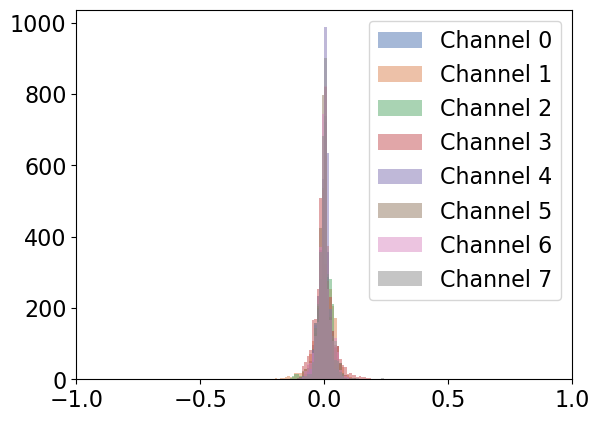

In [156]:
for i in range(8):
    actual_chan = f'Channel {i}_true'
    downs_chan = f'Channel {i}_downs'


    mergus[f'Channel {i}_diff'] = mergus[actual_chan] - mergus[downs_chan]

import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(mergus[f'Channel {i}_diff'].max())
    min_list.append(mergus[f'Channel {i}_diff'].min())
    avg_list.append(mergus[f'Channel {i}_diff'].mean())

    plt.hist(mergus[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.legend()
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.show() 

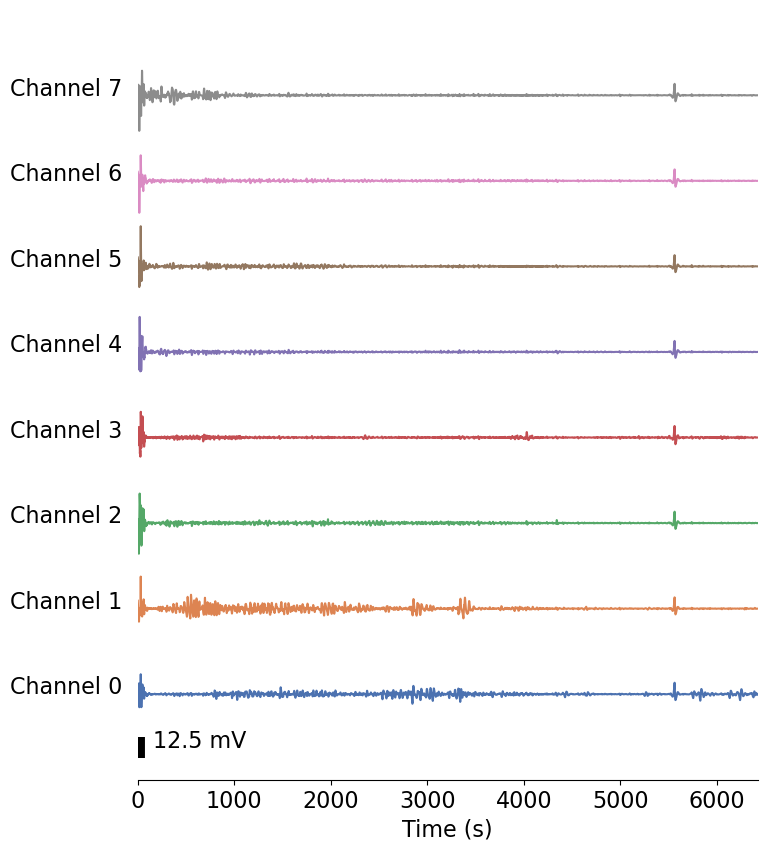

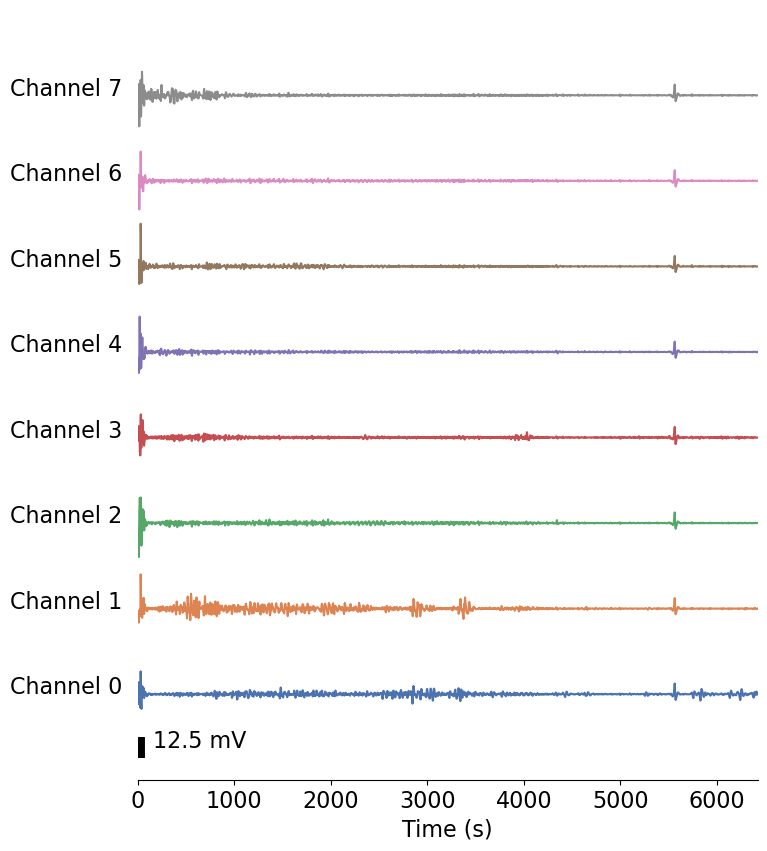

In [157]:
#Filtering dat for right freqs
a,b,c = signalplot(dats,rate=62.5,freq=[0.02,0.2], output='PD', figsize=(8,10), spacer=50)

#Filtering downs for right freqs
downs_nonan = downs.dropna()
_,e,f = signalplot(downs_nonan, rate=.5,freq=[0.02,0.2], output='PD', figsize=(8,10), spacer=50)


[2.565296531567314, 4.583777978041307, 4.057322703219542, 2.842493296756275, 3.1795202751567118, 4.477399970592682, 4.061044246347283, 4.297198046318377]
[-3.982632361261768, -4.429002887386687, -4.8629683232779914, -4.015085783227862, -4.0455211935881366, -4.46823349919887, -3.791102632997724, -4.075821371583883]
[-0.0036583648062991666, 0.0027813976332565233, 0.0050018728393516855, -0.0016425939106501275, 0.004160850515907334, 0.0004961406401627916, 0.0005874148519646772, -0.0005062594479761004]


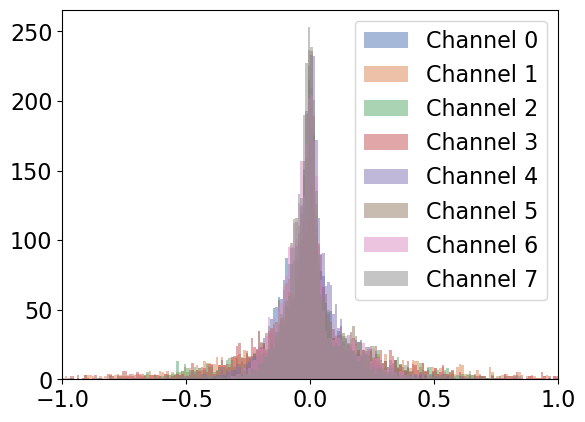

In [158]:
fc = pd.merge(f,c,on='Synctime', suffixes=('_downs', '_true'))

for i in range(8):
    actual_chan = f'Channel {i}_true'
    downs_chan = f'Channel {i}_downs'

    fc[f'Channel {i}_diff'] = fc[actual_chan] - fc[downs_chan]

import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(fc[f'Channel {i}_diff'].max())
    min_list.append(fc[f'Channel {i}_diff'].min())
    avg_list.append(fc[f'Channel {i}_diff'].mean())

    plt.hist(fc[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()
plt.show() 

In [159]:
error_metr = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(8):
    channel_actual = fc[f'Channel {i}_true'].dropna().values
    channel_downsampled = fc[f'Channel {i}_downs'].dropna().values
    
    error_metr['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metr['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metr['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metr['STD'].append(channel_actual.std())
    error_metr['VAR'].append(channel_actual.var())

    error_metr['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metr['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

err_df = pd.DataFrame(error_metr)
err_df['Euclidean_Norm'] = err_df['Euclidean'] / err_df['STD']
err_df['Chebyshev_Norm'] = err_df['Chebyshev'] / err_df['STD']

print(err_df)

     Channel       MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.036148  0.190128  0.106467  0.983997  0.968249  10.772031   
1  Channel 1  0.111140  0.333377  0.197375  1.326161  1.758703  18.888067   
2  Channel 2  0.079643  0.282210  0.153519  1.040768  1.083198  15.989149   
3  Channel 3  0.094181  0.306890  0.185943  0.719109  0.517118  17.387425   
4  Channel 4  0.038882  0.197186  0.094052  0.845331  0.714585  11.171917   
5  Channel 5  0.036225  0.190329  0.090189  0.819371  0.671369  10.783457   
6  Channel 6  0.035331  0.187965  0.096566  0.717399  0.514661  10.649506   
7  Channel 7  0.045902  0.214248  0.098277  0.963278  0.927904  12.138615   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   3.982632       10.947225        4.047405  
1   4.583778       14.242665        3.456426  
2   4.862968       15.362840        4.672482  
3   4.015086       24.179116        5.583416  
4   4.045521       13.216024        4.785723  
5   4.477400       13.16

[3.525605416260631, 4.808751754127863, 4.057322703219542, 4.28271854403833, 3.1795202751567118, 5.281610145424279, 5.199932180996812, 5.955031574811981]
[-3.982632361261768, -4.429002887386687, -4.8629683232779914, -4.015085783227862, -4.0455211935881366, -4.46823349919887, -3.791102632997724, -4.075821371583883]
[-0.003027358266077286, 0.004637378678334614, 0.005784591164047189, -0.0013896163689292107, 0.005083456559586432, 0.0022454838015463266, 0.0020190786264054194, 0.0012637790449539052]


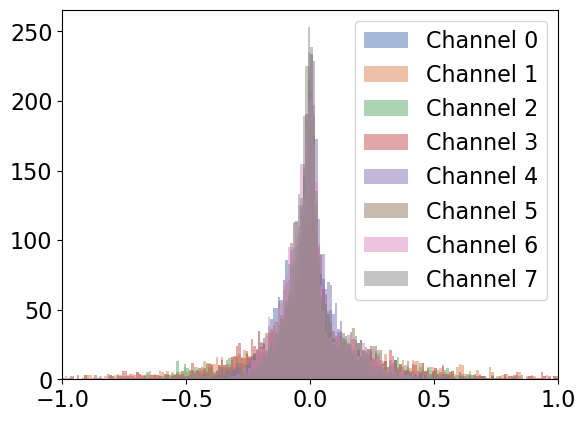

     Channel       MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.040385  0.200960  0.107945  0.987610  0.975374  11.348441   
1  Channel 1  0.118553  0.344316  0.198883  1.332079  1.774434  19.443935   
2  Channel 2  0.081600  0.285657  0.154614  1.044669  1.091334  16.131398   
3  Channel 3  0.099815  0.315935  0.186892  0.724963  0.525571  17.841254   
4  Channel 4  0.040481  0.201198  0.094689  0.849047  0.720880  11.361924   
5  Channel 5  0.045147  0.212478  0.091932  0.827133  0.684149  11.998913   
6  Channel 6  0.044068  0.209925  0.098652  0.725687  0.526622  11.854699   
7  Channel 7  0.057321  0.239417  0.100489  0.972322  0.945411  13.520197   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   3.982632       11.490810        4.032595  
1   4.808752       14.596686        3.609961  
2   4.862968       15.441632        4.655032  
3   4.282719       24.609895        5.907503  
4   4.045521       13.381978        4.764781  
5   5.281610       14.50

In [129]:
dat_filt = egg_filter2(dats,rate=62.5)
downs_filt = egg_filter2(downs, rate=.5)

merger = pd.merge_asof(downs_filt, dat_filt, on='timedelta', suffixes=('_downs', '_true'), direction='nearest')
merger = merger.dropna()


for i in range(8):
    actual_chan = f'Channel {i}_true'
    downs_chan = f'Channel {i}_downs'

    merger[f'Channel {i}_diff'] = merger[actual_chan] - merger[downs_chan]

import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(8):
    max_list.append(merger[f'Channel {i}_diff'].max())
    min_list.append(merger[f'Channel {i}_diff'].min())
    avg_list.append(merger[f'Channel {i}_diff'].mean())

    plt.hist(merger[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()
plt.show() 

error_metri = {
    'Channel': [f'Channel {i}' for i in range(8)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(8):
    channel_actual = merger[f'Channel {i}_true'].values
    channel_downsampled = merger[f'Channel {i}_downs'].values
    
    error_metri['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metri['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metri['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metri['STD'].append(channel_actual.std())
    error_metri['VAR'].append(channel_actual.var())

    error_metri['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metri['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

err_df1 = pd.DataFrame(error_metri)
err_df1['Euclidean_Norm'] = err_df1['Euclidean'] / err_df1['STD']
err_df1['Chebyshev_Norm'] = err_df1['Chebyshev'] / err_df1['STD']

print(err_df1)





In [24]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.spatial import distance


In [ ]:
#TRY IT FOR A NEW RECORDING USING 62.5SPS and DUTY CYCLING
file1=r"C:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Measurements\RF Readings miniPC\Downsampling\62.5_SPS_15min_rec_-20mVdc_50mHz_10mVpp"
# file2=

daty = read_egg_v3_sync(file1, rate=62.5, scale=300, date='2023.12.29')
print(daty)
datsy, downy = downsample_from_signalplot(daty)
mergy = pd.merge_asof(downy, daty, on='timedelta', suffixes=('_downs', '_true'), direction='nearest')
mergy = mergy.dropna()
mergy = mergy[mergy['timestamps_downs']>30]


[0.1263427734375]
[-0.135498046875]
[0.0003349752987132353]


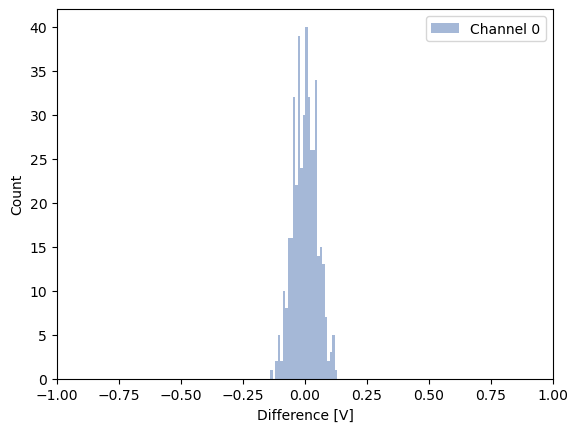

     Channel       MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.002267  0.047609  0.038559  3.524419  12.42153   0.981493   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   0.135498        0.278484        0.038445  


In [25]:
for i in range(1):
    actual_chan = f'Channel {i}_true'
    downs_chan = f'Channel {i}_downs'
    mergy[f'Channel {i}_diff'] = mergy[actual_chan] - mergy[downs_chan]

import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(1):
    max_list.append(mergy[f'Channel {i}_diff'].max())
    min_list.append(mergy[f'Channel {i}_diff'].min())
    avg_list.append(mergy[f'Channel {i}_diff'].mean())

    plt.hist(mergy[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()
plt.show()

error_metro = {
    'Channel': [f'Channel {i}' for i in range(1)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(1):
    channel_actual = mergy[f'Channel {i}_true'].values
    channel_downsampled = mergy[f'Channel {i}_downs'].values
    
    error_metro['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metro['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metro['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metro['STD'].append(channel_actual.std())
    error_metro['VAR'].append(channel_actual.var())

    error_metro['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metro['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

err_df2 = pd.DataFrame(error_metro)
err_df2['Euclidean_Norm'] = err_df2['Euclidean'] / err_df2['STD']
err_df2['Chebyshev_Norm'] = err_df2['Chebyshev'] / err_df2['STD']

print(err_df2)

[0.08879028513197862]
[-0.10664202448542914]
[0.00028023827312579665]


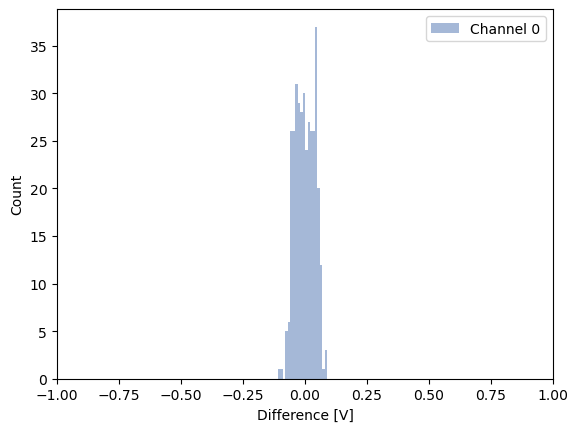

     Channel       MSE      RMSE       MAE       STD        VAR  Euclidean  \
0  Channel 0  0.001483  0.038512  0.032878  3.522147  12.405519   0.729699   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   0.106642        0.207175        0.030278  


In [28]:
daty_filt2 = butter_filter(daty, fs=62.5)
downy_filt2 = butter_filter(downy,fs=.5)
mergy_filt = pd.merge_asof(downy_filt2, daty_filt2, on='timestamps', suffixes=('_downs', '_true'), direction='nearest')
mergy_filt = mergy_filt.dropna()
mergy_filt = mergy_filt[(mergy_filt['timestamps'] > 80) & (mergy_filt['timestamps'] < 800)]

for i in range(1):
    actual_chan = f'Channel {i}_true'
    downs_chan = f'Channel {i}_downs'
    mergy_filt[f'Channel {i}_diff'] = mergy_filt[actual_chan] - mergy_filt[downs_chan]
    zero_diff = mergy_filt[mergy_filt[f'Channel {i}_diff'] == 0].index
    mergy_filt = mergy_filt.drop(zero_diff)

import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(1):
    max_list.append(mergy_filt[f'Channel {i}_diff'].max())
    min_list.append(mergy_filt[f'Channel {i}_diff'].min())
    avg_list.append(mergy_filt[f'Channel {i}_diff'].mean())

    plt.hist(mergy_filt[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()
plt.show()

error_metro = {
    'Channel': [f'Channel {i}' for i in range(1)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(1):
    channel_actual = mergy_filt[f'Channel {i}_true'].values
    channel_downsampled = mergy_filt[f'Channel {i}_downs'].values
    
    error_metro['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metro['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metro['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metro['STD'].append(channel_actual.std())
    error_metro['VAR'].append(channel_actual.var())

    error_metro['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metro['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

err_df2 = pd.DataFrame(error_metro)
err_df2['Euclidean_Norm'] = err_df2['Euclidean'] / err_df2['STD']
err_df2['Chebyshev_Norm'] = err_df2['Chebyshev'] / err_df2['STD']

print(err_df2)


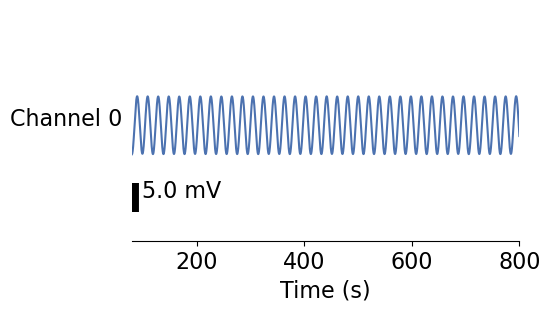

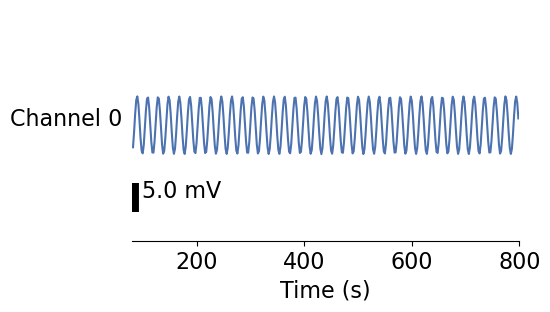

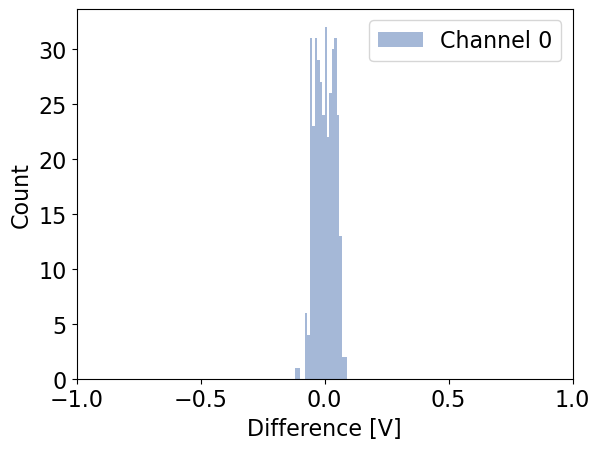

[0.08772219603570952]
[-0.11104098635349757]
[0.00035195123318366474]
     Channel      MSE     RMSE       MAE       STD        VAR  Euclidean  \
0  Channel 0  0.00152  0.03899  0.033317  3.523035  12.411772   0.738748   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   0.111041        0.209691        0.031519  


In [29]:
_,_,daty_filt = signalplot(daty,rate=62.5,xlim=(80,800),freq=[0.02,0.2], output='PD', skip_chan=[1,2,3,4,5,6,7], spacer=20, figsize=(5,3))
_,_,downy_filt = signalplot(downy,rate=.5,xlim=(80,800),freq=[0.02,0.2], output='PD', skip_chan=[1,2,3,4,5,6,7], spacer=20, figsize=(5,3))


mergy_filt = pd.merge_asof(downy_filt, daty_filt, on='Synctime', suffixes=('_downs', '_true'), direction='nearest')
mergy_filt = mergy_filt.dropna()
# mergy_filt = mergy_filt[(mergy_filt['Synctime'] >= 80) & (mergy_filt['Synctime'] <= 800)]


for i in range(1):
    actual_chan = f'Channel {i}_true'
    downs_chan = f'Channel {i}_downs'
    mergy_filt[f'Channel {i}_diff'] = mergy_filt[actual_chan] - mergy_filt[downs_chan]

sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(1):
    max_list.append(mergy_filt[f'Channel {i}_diff'].max())
    min_list.append(mergy_filt[f'Channel {i}_diff'].min())
    avg_list.append(mergy_filt[f'Channel {i}_diff'].mean())

    plt.figure()
    plt.hist(mergy_filt[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')
    plt.xlim(-1,1)
    plt.xlabel('Difference [V]')
    plt.ylabel('Count')
    plt.legend()    
    plt.show()

print(max_list)
print(min_list)
print(avg_list)

    
error_metro = {
    'Channel': [f'Channel {i}' for i in range(1)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(1):
    channel_actual = mergy_filt[f'Channel {i}_true'].values
    channel_downsampled = mergy_filt[f'Channel {i}_downs'].values

    error_metro['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metro['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metro['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metro['STD'].append(channel_actual.std())
    error_metro['VAR'].append(channel_actual.var())

    error_metro['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metro['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

err_df2 = pd.DataFrame(error_metro)
err_df2['Euclidean_Norm'] = err_df2['Euclidean'] / err_df2['STD']
err_df2['Chebyshev_Norm'] = err_df2['Chebyshev'] / err_df2['STD']

print(err_df2)

2023-12-29 00:00:00


c:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Coding\Ephys\Thesis Python\functions_read_bursts.py:1115: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2023-12-29 16:27:51.243000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  avg_vals[col]=group[col].iloc[0]
c:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Coding\Ephys\Thesis Python\functions_read_bursts.py:1115: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2023-12-29 16:27:52.251000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  avg_vals[col]=group[col].iloc[0]
c:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Coding\Ephys\Thesis Python\functions_read_bursts.py:1115: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise 

plotted!
plotted!


(<Figure size 500x200 with 1 Axes>,
 <Axes: xlabel='Time (s)'>,
 array([[ 1.02000000e+02,  1.02654202e+00],
        [ 1.04000000e+02,  2.06665772e+00],
        [ 1.06000000e+02,  2.39987734e+00],
        [ 1.08000000e+02,  1.85245282e+00],
        [ 1.10000000e+02,  4.81671608e-01],
        [ 1.12000000e+02, -1.00041282e+00],
        [ 1.14000000e+02, -2.23573305e+00],
        [ 1.16000000e+02, -2.61298645e+00],
        [ 1.18000000e+02, -1.70421343e+00],
        [ 1.20000000e+02, -3.90675933e-01],
        [ 1.22000000e+02,  1.01996958e+00],
        [ 1.24000000e+02,  2.39940359e+00],
        [ 1.26000000e+02,  2.57242008e+00],
        [ 1.28000000e+02,  1.54565055e+00],
        [ 1.30000000e+02,  1.59150857e-01],
        [ 1.32000000e+02, -1.39288460e+00],
        [ 1.34000000e+02, -2.44123622e+00],
        [ 1.36000000e+02, -2.38579981e+00],
        [ 1.38000000e+02, -1.34258822e+00],
        [ 1.40000000e+02,  2.21182565e-01],
        [ 1.42000000e+02,  1.53958445e+00],
        [ 1.

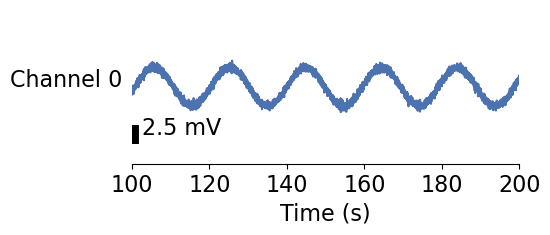

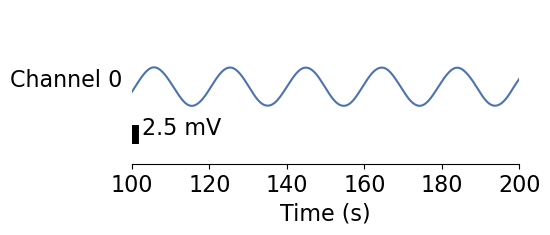

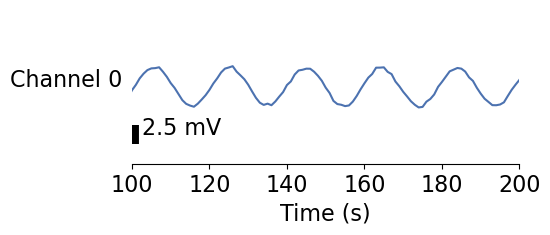

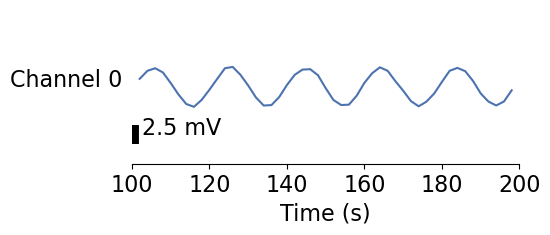

In [47]:
#TRY IT FOR A NEW RECORDING USING 62.5SPS recording with noise
file2=r"C:\Users\CoenBerns\OneDrive - Mass General Brigham\Documents\Thesis\Measurements\RF Readings miniPC\Downsampling\62.5_SPS_15min_rec_-20mVdc_50mHz_10mVpp_noise50mVstd"

daty = read_egg_v3_sync(file2, rate=62.5, scale=300, date='2023.12.29')
datsy, downy = downsample_from_signalplot(daty, time_str='1S', filtered=False)
mergy = pd.merge_asof(downy, daty, on='timedelta', suffixes=('_downs', '_true'), direction='nearest')
mergy = mergy.dropna()
mergy = mergy[mergy['timestamps_downs']>80]

signalplot(daty, xlim=(100,200),rate=62.5, skip_chan=[1,2,3,4,5,6,7], figsize=(5,2), spacer=10)
signalplot(daty,xlim=(100,200),rate=62.5, skip_chan=[1,2,3,4,5,6,7], figsize=(5,2), spacer=10, freq=[0.02,0.2])
signalplot(downy, xlim=(100,200), rate=.5, skip_chan=[1,2,3,4,5,6,7], figsize=(5,2), spacer=10)
signalplot(downy,xlim=(100,200),rate=.5, skip_chan=[1,2,3,4,5,6,7], figsize=(5,2), spacer=10, freq=[0.02,0.2])


[0.692138671875]
[-0.5841064453125]
[0.0005166837484529703]


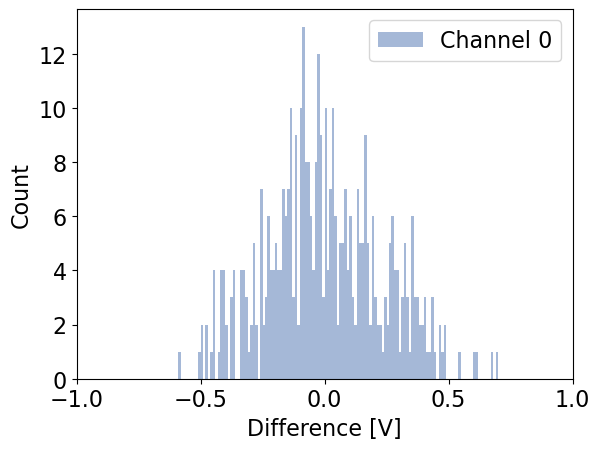

     Channel      MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.05478  0.234051  0.187384  1.779821  3.167763   4.704371   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   0.692139        2.643171        0.388881  


In [41]:
for i in range(1):
    actual_chan = f'Channel {i}_true'
    downs_chan = f'Channel {i}_downs'
    mergy[f'Channel {i}_diff'] = mergy[actual_chan] - mergy[downs_chan]

import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(1):
    max_list.append(mergy[f'Channel {i}_diff'].max())
    min_list.append(mergy[f'Channel {i}_diff'].min())
    avg_list.append(mergy[f'Channel {i}_diff'].mean())

    plt.hist(mergy[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()
plt.show()

error_metro = {
    'Channel': [f'Channel {i}' for i in range(1)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(1):
    channel_actual = mergy[f'Channel {i}_true'].values
    channel_downsampled = mergy[f'Channel {i}_downs'].values
    
    error_metro['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metro['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metro['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metro['STD'].append(channel_actual.std())
    error_metro['VAR'].append(channel_actual.var())

    error_metro['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metro['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

err_df2 = pd.DataFrame(error_metro)
err_df2['Euclidean_Norm'] = err_df2['Euclidean'] / err_df2['STD']
err_df2['Chebyshev_Norm'] = err_df2['Chebyshev'] / err_df2['STD']

print(err_df2)

[0.33532170872368816]
[-0.28776553918510495]
[-0.001167950063970145]


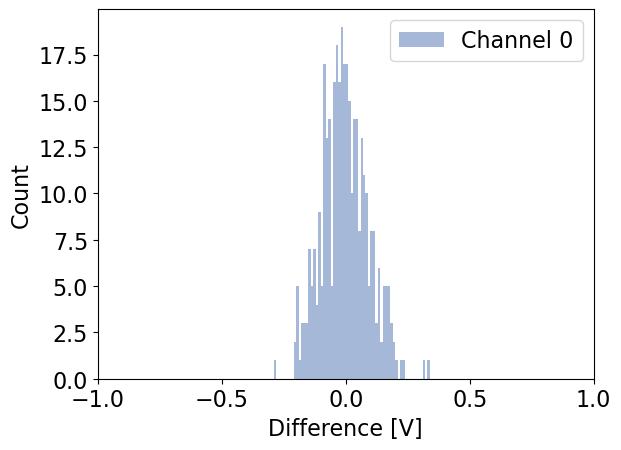

     Channel       MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.008816  0.093892  0.073838  1.751396  3.067388   1.779002   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   0.335322        1.015762         0.19146  


In [42]:
daty_filt2 = butter_filter(daty, fs=62.5)
downy_filt2 = butter_filter(downy,fs=.5)
mergy_filt = pd.merge_asof(downy_filt2, daty_filt2, on='timestamps', suffixes=('_downs', '_true'), direction='nearest')
mergy_filt = mergy_filt.dropna()
mergy_filt = mergy_filt[(mergy_filt['timestamps'] > 80) & (mergy_filt['timestamps'] < 800)]

for i in range(1):
    actual_chan = f'Channel {i}_true'
    downs_chan = f'Channel {i}_downs'
    mergy_filt[f'Channel {i}_diff'] = mergy_filt[actual_chan] - mergy_filt[downs_chan]
    zero_diff = mergy_filt[mergy_filt[f'Channel {i}_diff'] == 0].index
    mergy_filt = mergy_filt.drop(zero_diff)

import seaborn as sns
sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(1):
    max_list.append(mergy_filt[f'Channel {i}_diff'].max())
    min_list.append(mergy_filt[f'Channel {i}_diff'].min())
    avg_list.append(mergy_filt[f'Channel {i}_diff'].mean())

    plt.hist(mergy_filt[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')

print(max_list)
print(min_list)
print(avg_list)
plt.xlim(-1, 1)
plt.xlabel('Difference [V]')
plt.ylabel('Count')
plt.legend()
plt.show()

error_metro = {
    'Channel': [f'Channel {i}' for i in range(1)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(1):
    channel_actual = mergy_filt[f'Channel {i}_true'].values
    channel_downsampled = mergy_filt[f'Channel {i}_downs'].values
    
    error_metro['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metro['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metro['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metro['STD'].append(channel_actual.std())
    error_metro['VAR'].append(channel_actual.var())

    error_metro['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metro['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

err_df2 = pd.DataFrame(error_metro)
err_df2['Euclidean_Norm'] = err_df2['Euclidean'] / err_df2['STD']
err_df2['Chebyshev_Norm'] = err_df2['Chebyshev'] / err_df2['STD']

print(err_df2)

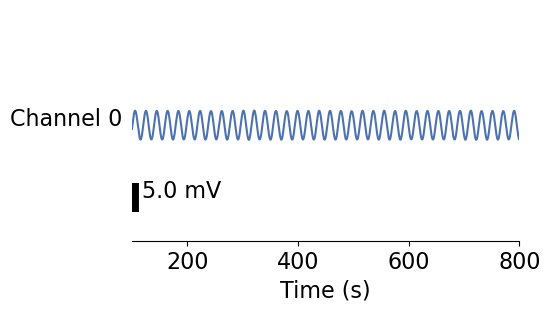

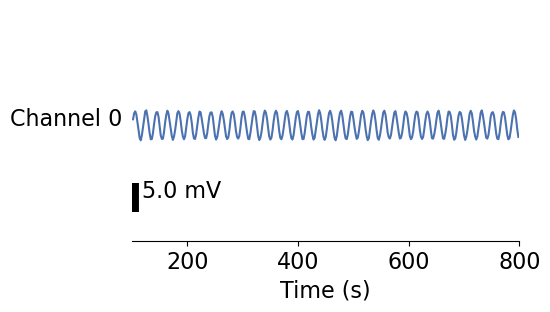

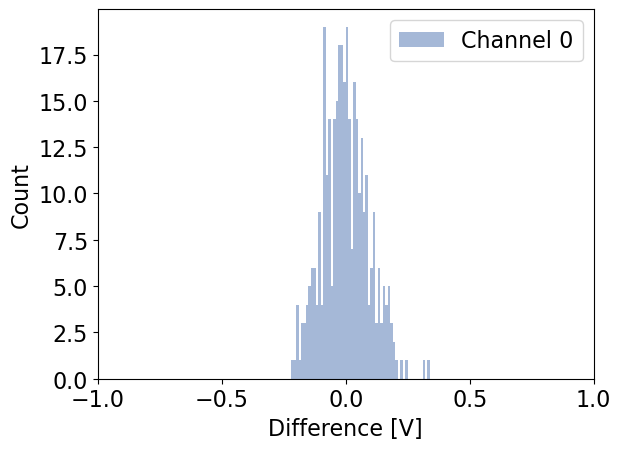

[0.3376971777871478]
[-0.2172113989454847]
[0.0007355388016940745]
     Channel       MSE      RMSE       MAE       STD       VAR  Euclidean  \
0  Channel 0  0.008626  0.092875  0.073165  1.753034  3.073128   1.735052   

   Chebyshev  Euclidean_Norm  Chebyshev_Norm  
0   0.337697        0.989742        0.192636  


In [43]:
_,_,daty_filt = signalplot(daty,rate=62.5,xlim=(100,800),freq=[0.02,0.2], output='PD', skip_chan=[1,2,3,4,5,6,7], spacer=20, figsize=(5,3))
_,_,downy_filt = signalplot(downy,rate=.5,xlim=(100,800),freq=[0.02,0.2], output='PD', skip_chan=[1,2,3,4,5,6,7], spacer=20, figsize=(5,3))


mergy_filt = pd.merge_asof(downy_filt, daty_filt, on='Synctime', suffixes=('_downs', '_true'), direction='nearest')
mergy_filt = mergy_filt.dropna()
# mergy_filt = mergy_filt[(mergy_filt['Synctime'] >= 80) & (mergy_filt['Synctime'] <= 800)]


for i in range(1):
    actual_chan = f'Channel {i}_true'
    downs_chan = f'Channel {i}_downs'
    mergy_filt[f'Channel {i}_diff'] = mergy_filt[actual_chan] - mergy_filt[downs_chan]

sns.set_palette('deep')
bin_edges = np.linspace(-1, 1, num=201)
max_list=[]
min_list=[]
avg_list=[]  
for i in range(1):
    max_list.append(mergy_filt[f'Channel {i}_diff'].max())
    min_list.append(mergy_filt[f'Channel {i}_diff'].min())
    avg_list.append(mergy_filt[f'Channel {i}_diff'].mean())

    plt.figure()
    plt.hist(mergy_filt[f'Channel {i}_diff'], bins=bin_edges, alpha=0.5, label=f'Channel {i}')
    plt.xlim(-1,1)
    plt.xlabel('Difference [V]')
    plt.ylabel('Count')
    plt.legend()    
    plt.show()

print(max_list)
print(min_list)
print(avg_list)

    
error_metro = {
    'Channel': [f'Channel {i}' for i in range(1)],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'STD': [],
    'VAR': [],
    'Euclidean': [],
    'Chebyshev': []
}

for i in range(1):
    channel_actual = mergy_filt[f'Channel {i}_true'].values
    channel_downsampled = mergy_filt[f'Channel {i}_downs'].values

    error_metro['MSE'].append(mse(channel_actual, channel_downsampled))
    error_metro['RMSE'].append(np.sqrt(mse(channel_actual, channel_downsampled)))
    error_metro['MAE'].append(mae(channel_actual, channel_downsampled))
    error_metro['STD'].append(channel_actual.std())
    error_metro['VAR'].append(channel_actual.var())

    error_metro['Euclidean'].append(distance.euclidean(channel_actual, channel_downsampled))
    error_metro['Chebyshev'].append(distance.chebyshev(channel_actual, channel_downsampled))

err_df2 = pd.DataFrame(error_metro)
err_df2['Euclidean_Norm'] = err_df2['Euclidean'] / err_df2['STD']
err_df2['Chebyshev_Norm'] = err_df2['Chebyshev'] / err_df2['STD']

print(err_df2)